# Aprendizado de máquina e inteligência artificial em física - PGF5393 & 4305512 (2025)


Carlos Gabriel Santos da Silva  N°USP: 13957353


Giulya Souza dos Santos N°USP: 14740109


Pierre Augusto Ré Martho N°USP: 11298622

Yasmmin Ferreira Tamburus N°USP: 11367491



## Imports

In [1]:
dark_mode = True

# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, RandomizedSearchCV
from sklearn.metrics import (make_scorer, accuracy_score, precision_score, recall_score,
                            f1_score, ConfusionMatrixDisplay, confusion_matrix,
                            matthews_corrcoef, classification_report, roc_auc_score)
from sklearn.dummy import DummyRegressor
import pickle
import joblib
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from astropy.coordinates import SkyCoord
from astropy import units as u
import optuna
from sklearn.model_selection import cross_val_score
import os
from re import M

# PyTorch imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset

# Display settings
pd.set_option("display.max_rows", 300)
pd.set_option("display.max_columns", None)

# Resetar matplotlib para tema padrão (claro)
plt.style.use('default')
plt.rcParams.update(plt.rcParamsDefault)

# Random seed for reproducibility
SEED = 333
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)

import matplotlib
# Plot visual settings
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

thesis_settings = {
    # Use LaTeX to write all text
    "text.usetex": False,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "font.size": 11,
    "axes.labelsize": "medium",
    "axes.titlesize": "medium",
    "figure.labelsize": "medium",
    "figure.titlesize": "medium",
    # Make the legend/label fonts a little smaller
    "legend.fontsize": "small",
    "legend.title_fontsize": "small",
    "xtick.labelsize": "small",
    "ytick.labelsize": "small",
    # Enable axis grids
    "axes.grid": True,
    "grid.alpha": 0.5,
    # Constrained layout
    "figure.constrained_layout.use": True, # When this in True, do not use tight_layout
    "savefig.transparent": False,
    'savefig.bbox': 'tight',
}
plt.rcParams.update(thesis_settings)

if dark_mode == True:
    #If the plots are to be used in a dark presentation
    plt.style.use('default')
    default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    plt.style.use("dark_background")
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=default_colors)
    plt.rcParams.update(thesis_settings)
    plt.rcParams.update({
        "grid.linewidth": 0.5,
        "grid.alpha": 0.5,
        "legend.facecolor": "#1a1a1a",
        "legend.edgecolor": "white",
        "text.color": 'white',
        "axes.facecolor": "#070207",
        "savefig.facecolor": (0.0, 0.0, 0.0, 0.0)
        })
    bbox = dict(facecolor='#1a1a1a', edgecolor='white', lw=0.5, boxstyle='round,pad=0.2')
    details_colour = 'white'

    # Configurações específicas para seaborn com tema escuro
    import seaborn as sns
    sns.set_theme(style="darkgrid", rc={
        'axes.facecolor': '#070207',
        'figure.facecolor': '#070207',
        'grid.color': 'white',
        'grid.alpha': 0.2,
        'text.color': 'white',
        'axes.labelcolor': 'white',
        'xtick.color': 'white',
        'ytick.color': 'white'
    })

    bbox = dict(facecolor='#1a1a1a', edgecolor='white', lw=0.5, boxstyle='round,pad=0.2')
    details_colour = 'white'

saveformat = 'png' # pode ser 'pdf' ou 'svg'

/home/pierre/anaconda3/envs/main/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Função auxiliar para salvar figuras em ambos os modos (dark e light)
def save_figure(filename, fig=None):
    """
    Salva a figura atual em AMBOS os modos (claro e escuro).
    
    Parameters:
    -----------
    filename : str
        Nome base do arquivo (sem extensão)
    fig : matplotlib figure, optional
        Figura a ser salva. Se None, usa plt.gcf()
    """
    if fig is None:
        fig = plt.gcf()
    
    # Criar diretório se não existir
    os.makedirs('imagens', exist_ok=True)
    
    # VERSÃO LIGHT - Forçar configurações light
    fig.patch.set_facecolor('white')
    for ax in fig.get_axes():
        ax.set_facecolor('white')
        ax.spines['bottom'].set_color('black')
        ax.spines['top'].set_color('black')
        ax.spines['left'].set_color('black')
        ax.spines['right'].set_color('black')
        ax.xaxis.label.set_color('black')
        ax.yaxis.label.set_color('black')
        ax.title.set_color('black')
        ax.tick_params(colors='black', which='both')
        for text in ax.get_xticklabels() + ax.get_yticklabels():
            text.set_color('black')
        # Grid padrão
        ax.grid(color='gray', alpha=0.5)
        # Legenda light
        legend = ax.get_legend()
        if legend:
            legend.get_frame().set_facecolor('white')
            legend.get_frame().set_edgecolor('black')
            for text in legend.get_texts():
                text.set_color('black')
    
    # Título principal light
    if fig._suptitle:
        fig._suptitle.set_color('black')
    
    # Salvar versão light
    fig.savefig(f'imagens/{filename}.{saveformat}', dpi=300, bbox_inches='tight', facecolor='white')
    
    # VERSÃO DARK - Aplicar configurações dark
    fig.patch.set_facecolor('#070207')
    for ax in fig.get_axes():
        ax.set_facecolor('#070207')
        ax.spines['bottom'].set_color('white')
        ax.spines['top'].set_color('white')
        ax.spines['left'].set_color('white')
        ax.spines['right'].set_color('white')
        ax.xaxis.label.set_color('white')
        ax.yaxis.label.set_color('white')
        ax.title.set_color('white')
        ax.tick_params(colors='white', which='both')
        for text in ax.get_xticklabels() + ax.get_yticklabels():
            text.set_color('white')
        # Grid branco
        ax.grid(color='white', alpha=0.2)
        # Legenda dark
        legend = ax.get_legend()
        if legend:
            legend.get_frame().set_facecolor('#1a1a1a')
            legend.get_frame().set_edgecolor('white')
            for text in legend.get_texts():
                text.set_color('white')
    
    # Título principal dark
    if fig._suptitle:
        fig._suptitle.set_color('white')
    
    # Salvar versão dark
    fig.savefig(f'imagens/{filename}_dark.{saveformat}', dpi=300, bbox_inches='tight', facecolor='#070207')
    
    print(f"✓ Figuras salvas: imagens/{filename}.{saveformat} (light e dark)")

## Análise exploratória

Dados provenientes do levantamento fotométrico S-PLUS.

In [5]:
path_train_main = "./data/photoz_main.parquet"

train_main = pd.read_parquet(path_train_main, engine='pyarrow')

Atributos utilizados na análise

In [4]:
# Filtros de banda larga (broadbands)
BROADBANDS = ['u', 'g', 'r', 'i', 'z']

# Filtros de banda estreita (narrowband)
NARROWBANDS = ['j0378', 'j0395', 'j0410', 'j0430', 'j0515', 'j0660', 'j0861']


BASIC_COLS = ['id', 'ra', 'dec', 'z', 'e_z']

mags_auto = [f'mag_auto_{mag}' for mag in BROADBANDS + NARROWBANDS]
err_mags_auto = [f'err_mag_auto_{mag}' for mag in BROADBANDS + NARROWBANDS]

O ajuste dos dados será feito por meio de uma análise exploratório do conjunto de dados train_main. O conjuto apresenta 28 features e 3108756 linhas, para filtrar dados que não contribuem para treinamento será feita a remoção de magnitudes maiores que 21 (limite do S-PLUS).

In [7]:
print(f"Shape inicial dos dados: {train_main.shape}")
print(f"\nPrimeiras linhas:")
train_main.head()

Shape inicial dos dados: (3108756, 29)

Primeiras linhas:


id          ra        dec        z  e_z  mag_auto_u  \
0  i06n18s18001A7  175.943517 -23.587699  1.04864  NaN   20.277293   
1  i06n18s18001MH  175.555797 -23.578416  0.72373  NaN   21.818986   
2  i06n18s18001TE  175.047986 -23.572383  1.11743  NaN   19.591906   
3  i06n18s18001VX  174.844348 -23.568633  0.88875  NaN   20.826173   
4  i06n18s180020D  175.838464 -23.567624  2.65685  NaN   21.117917   

   mag_auto_g  mag_auto_r  mag_auto_i  mag_auto_z  mag_auto_j0378  \
0   20.120172   19.762041   19.694902   19.722958       20.127302   
1   20.465810   20.533571   20.198797   19.970450       22.261784   
2   19.730809   19.397317   19.281098   19.129115       19.839671   
3   20.935200   20.492187   20.417405   20.849883       20.547972   
4   20.219272   19.883008   19.954022   19.816639       20.375182   

   mag_auto_j0395  mag_auto_j0410  mag_auto_j0430  mag_auto_j0515  \
0       20.242325       20.261901       20.532771       20.059221   
1       21.436583       20.312107       20.475960       20.437926   
2       19.883803       19.398864       19.596744       19.600159   
3       21.285364       21.190351       20.261062       20.720682   
4       21.299686       20.737359       20.299591       19.997370   

   mag_auto_j0660  mag_auto_j0861  err_mag_auto_u  err_mag_auto_g  \
0       19.672898       20.111174        0.070561        0.056693   
1       20.908488       20.113799        0.435182        0.118789   
2       19.368172       19.420694        0.072505        0.075176   
3       20.402840       20.734328        0.129348        0.132739   
4       20.016784       20.443599        0.216408        0.092696   

   err_mag_auto_r  err_mag_auto_i  err_mag_auto_z  err_mag_auto_j0378  \
0        0.041788        0.048521        0.085553            0.082318   
1        0.128553        0.119463        0.171816            0.843198   
2        0.056415        0.064076        0.096469            0.117101   
3        0.090529        0.107546        0.271939            0.139968   
4        0.069273        0.092420        0.144722            0.146356   

   err_mag_auto_j0395  err_mag_auto_j0410  err_mag_auto_j0430  \
0            0.140760            0.143022            0.174505   
1            0.650272            0.233774            0.258002   
2            0.196281            0.127555            0.144458   
3            0.434599            0.390660            0.159157   
4            0.545217            0.330855            0.213931   

   err_mag_auto_j0515  err_mag_auto_j0660  err_mag_auto_j0861  
0            0.104951            0.043581            0.145700  
1            0.231810            0.203063            0.233605  
2            0.131909            0.061533            0.150597  
3            0.214576            0.093533            0.291475  
4            0.149465            0.087521            0.306690

In [8]:
# Cortar (remover) todas as linhas que tenham ANY magnitude > MAG_LIMIT (não trocar por NaN)
MAG_LIMIT = 21.0

# Criar cópia para trabalhar
df = train_main.copy()

# Máscara: True onde qualquer magnitude excede o limite
mask_any_gt = (df[mags_auto] > MAG_LIMIT).any(axis=1)

# Quantidade removida e aplicar corte
n_removed = mask_any_gt.sum()
df = df.loc[~mask_any_gt].reset_index(drop=True)

print(f"Linhas removidas (alguma magnitude > {MAG_LIMIT}): {n_removed} / {len(train_main)} ({n_removed/len(train_main)*100:.2f}%)")
print(f"Shape após corte: {df.shape}")

Linhas removidas (alguma magnitude > 21.0): 1892052 / 3108756 (60.86%)
Shape após corte: (1216704, 29)


Após a filtragem será feita a verificação de dados faltantes:

In [9]:
# Contar NaNs por magnitude
nan_counts = df[mags_auto].isna().sum().sort_values(ascending=False)

print("=" * 60)
print("Quantidade de NaNs por magnitude:")
print("=" * 60)
for mag, count in nan_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{mag:20s}: {count:6d} ({percentage:5.2f}%)")

Quantidade de NaNs por magnitude:
mag_auto_j0395      :  42879 ( 3.52%)
mag_auto_j0378      :  31101 ( 2.56%)
mag_auto_j0410      :  30293 ( 2.49%)
mag_auto_u          :  29973 ( 2.46%)
mag_auto_j0430      :  23589 ( 1.94%)
mag_auto_j0515      :   8075 ( 0.66%)
mag_auto_g          :   5898 ( 0.48%)
mag_auto_j0861      :   3769 ( 0.31%)
mag_auto_i          :   3202 ( 0.26%)
mag_auto_j0660      :   2517 ( 0.21%)
mag_auto_z          :   2217 ( 0.18%)
mag_auto_r          :   1578 ( 0.13%)


In [10]:
# Contar quantas magnitudes faltam por objeto
nan_per_object = df[mags_auto].isna().sum(axis=1)

# Estatísticas gerais
print("=" * 60)
print("Estatísticas de magnitudes faltantes por objeto:")
print("=" * 60)
print(f"Total de objetos: {len(df)}")
print(f"Objetos sem nenhum NaN: {(nan_per_object == 0).sum()} ({(nan_per_object == 0).sum() / len(df) * 100:.2f}%)")
print(f"Objetos com pelo menos 1 NaN: {(nan_per_object > 0).sum()} ({(nan_per_object > 0).sum() / len(df) * 100:.2f}%)")
print(f"Média de NaNs por objeto: {nan_per_object.mean():.2f}")
print(f"Mediana de NaNs por objeto: {nan_per_object.median():.1f}")
print(f"Máximo de NaNs em um objeto: {nan_per_object.max()}")


# Distribuição detalhada: quantos objetos têm 0, 1, 2, 3... magnitudes faltantes
distribution = nan_per_object.value_counts().sort_index()

print("\n" + "=" * 60)
print("Distribuição de objetos por quantidade de magnitudes faltantes:")
print("=" * 60)
print(f"{'Nº NaNs':<10} {'Nº Objetos':<15} {'Percentual':<15}")
print("-" * 60)

for n_nans, count in distribution.items():
    percentage = (count / len(df)) * 100
    print(f"{int(n_nans):<10} {count:<15} {percentage:5.2f}%")

Estatísticas de magnitudes faltantes por objeto:
Total de objetos: 1216704
Objetos sem nenhum NaN: 1117982 (91.89%)
Objetos com pelo menos 1 NaN: 98722 (8.11%)
Média de NaNs por objeto: 0.15
Mediana de NaNs por objeto: 0.0
Máximo de NaNs em um objeto: 12

Distribuição de objetos por quantidade de magnitudes faltantes:
Nº NaNs    Nº Objetos      Percentual     
------------------------------------------------------------
0          1117982         91.89%
1          56905            4.68%
2          20566            1.69%
3          10185            0.84%
4          5095             0.42%
5          2991             0.25%
6          1394             0.11%
7          690              0.06%
8          470              0.04%
9          211              0.02%
10         97               0.01%
11         75               0.01%
12         43               0.00%


✓ Figuras salvas: imagens/analise_nans.png (light e dark)


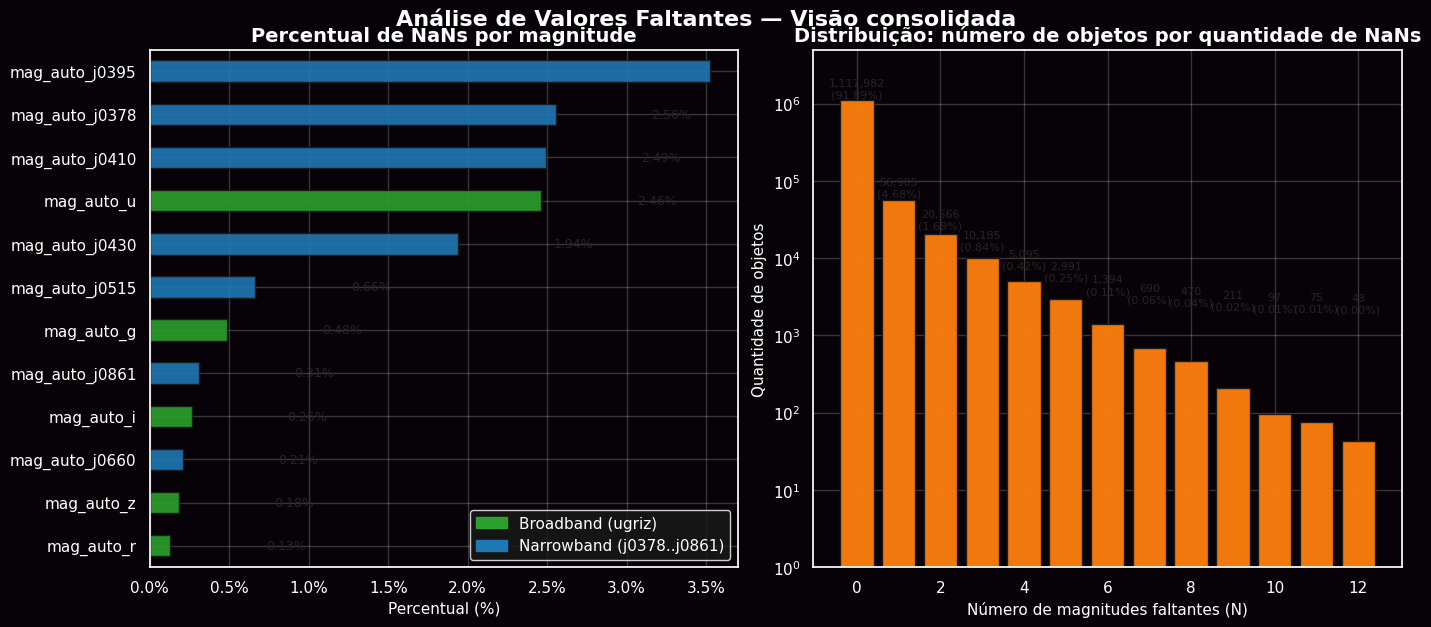

In [11]:
from matplotlib.patches import Patch

# Layout reduzido: apenas 2 plots (percentual por magnitude | distribuição de N NaNs por objeto)
sns.set_style('whitegrid')
broad_color = '#2ca02c'   # verde (broad)
narrow_color = '#1f77b4'  # azul (narrow)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 1]})

# --- Esquerda: Percentual de NaNs por magnitude (ordenado) ---
ax = axes[0]
nan_percentages = (df[mags_auto].isna().sum() / len(df) * 100).loc[nan_counts.index]
nan_percentages = nan_percentages.sort_values(ascending=True)
colors = [narrow_color if 'mag_auto_j' in mag else broad_color for mag in nan_percentages.index]
nan_percentages.plot(kind='barh', ax=ax, color=colors, edgecolor='k', alpha=0.9)

ax.set_title('Percentual de NaNs por magnitude', fontsize=14, fontweight='bold')
ax.set_xlabel('Percentual (%)', fontsize=11)
ax.set_ylabel('')
ax.xaxis.set_major_formatter(lambda x, pos: f"{x:.1f}%")  # formatação simples

# Anotações com porcentagem na barra
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f"{width:.2f}%", (width + 0.6, p.get_y() + p.get_height() / 2),
                va='center', fontsize=9)

# Legenda customizada
ax.legend(handles=[Patch(color=broad_color, label='Broadband (ugriz)'),
                   Patch(color=narrow_color, label='Narrowband (j0378..j0861)')],
          loc='lower right', frameon=True)

# --- Direita: Distribuição de quantos objetos têm N NaNs (counts + %) ---
ax2 = axes[1]
distribution_sorted = distribution.sort_index()
x = distribution_sorted.index.astype(int)
y = distribution_sorted.values
bars = ax2.bar(x, y, color='#ff7f0e', edgecolor='k', alpha=0.95)

ax2.set_title('Distribuição: número de objetos por quantidade de NaNs', fontsize=14, fontweight='bold')
ax2.set_xlabel('Número de magnitudes faltantes (N)', fontsize=11)
ax2.set_ylabel('Quantidade de objetos', fontsize=11)
ax2.set_yscale('log')
ax2.set_ylim([1e0,5e6])
ax2.grid(axis='y', alpha=0.3)

# Anotar contagem e percentual acima das barras
total = len(df)
for i, (xi, yi) in enumerate(zip(x, y)):
    pct = yi / total * 100
    ax2.text(xi, yi + total * 0.0015, f"{yi:,}\n({pct:.2f}%)", ha='center', va='bottom', fontsize=8)

# Melhor ajuste de layout
plt.suptitle('Análise de Valores Faltantes — Visão consolidada', fontsize=16, fontweight='bold', y=1.02)
save_figure('analise_nans')
plt.show()


Observando os gráficos acima, é perceptível que a variável (ou feature) mag_auto_j0395 apresenta o maior percentual de dados faltantes no conjunto. Outra análise pertinente é verificar se a própria ausência desses dados possui correlação entre as diferentes features. Por meio da matriz de correlação abaixo, é possível verificar que a ocorrência de dados faltantes não apresenta forte correlação entre as variáveis, o que sugere um padrão de aleatoriedade.

✓ Figuras salvas: imagens/correlacao_nans.png (light e dark)


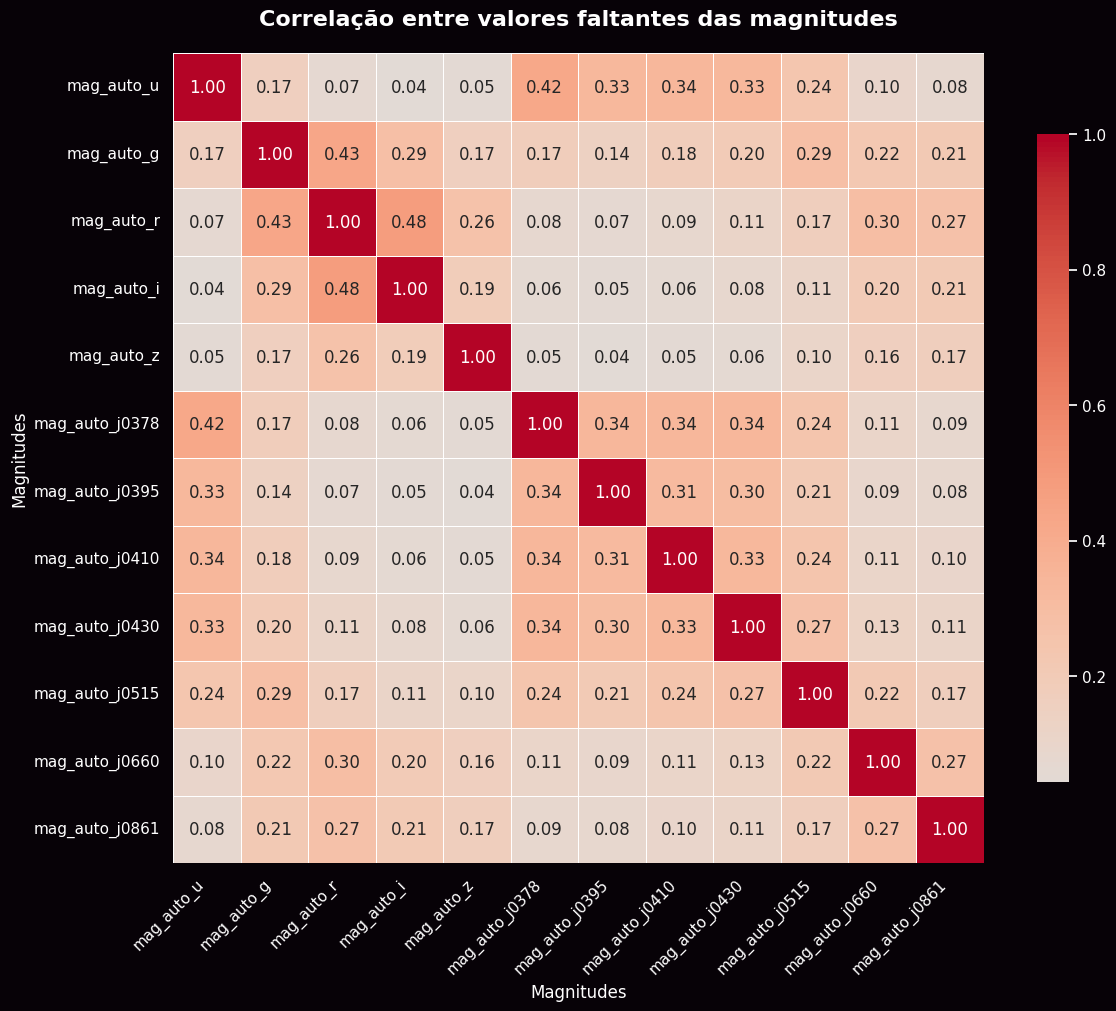

In [12]:
# Heatmap de correlação de NaNs entre magnitudes
nan_matrix = df[mags_auto].isna().astype(int)
nan_corr = nan_matrix.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(nan_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlação entre valores faltantes das magnitudes', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Magnitudes', fontsize=12)
plt.ylabel('Magnitudes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
save_figure('correlacao_nans')
plt.show()

Para tratar os dados faltantes do sistema, será utilizada a técnica de Imputação Multivariada por Equações Encadeadas (MICE). Esta técnica consiste na substituição de valores ausentes por meio de um método iterativo de aprendizado de máquina. O diferencial do MICE é que ele modela cada variável com dados faltantes usando as demais variáveis do dataset como preditoras. Esse processo de imputação e treinamento é repetido em ciclos (neste caso, 10 iterações), permitindo que os valores imputados convirjam e preservem a estrutura e as correlações naturais dos dados.


In [12]:
# Imputação com MICE e salvar dataset
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

print("Imputando valores faltantes com MICE...")
print(f"NaNs antes: {df[mags_auto].isna().sum().sum()}")

# MICE usando as próprias 12 magnitudes
mice_imputer = IterativeImputer(max_iter=10, random_state=SEED, verbose=0)
df_imputed = df.copy()
df_imputed[mags_auto] = mice_imputer.fit_transform(df[mags_auto])

print(f"NaNs depois: {df_imputed[mags_auto].isna().sum().sum()}")

# Salvar dataset imputado
output_path = "./data/photoz_main_mice.parquet"
df_imputed.to_parquet(output_path, engine='pyarrow', index=False)
print(f"\n✓ Dataset imputado salvo em: {output_path}")
print(f"  Shape: {df_imputed.shape}")

Imputando valores faltantes com MICE...
NaNs antes: 185091


/home/pierre/anaconda3/envs/main/lib/python3.11/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


NaNs depois: 0

✓ Dataset imputado salvo em: ./data/photoz_main_mice.parquet
  Shape: (1216704, 29)

✓ Dataset imputado salvo em: ./data/photoz_main_mice.parquet
  Shape: (1216704, 29)


✓ Figuras salvas: imagens/correlacao_col.png (light e dark)


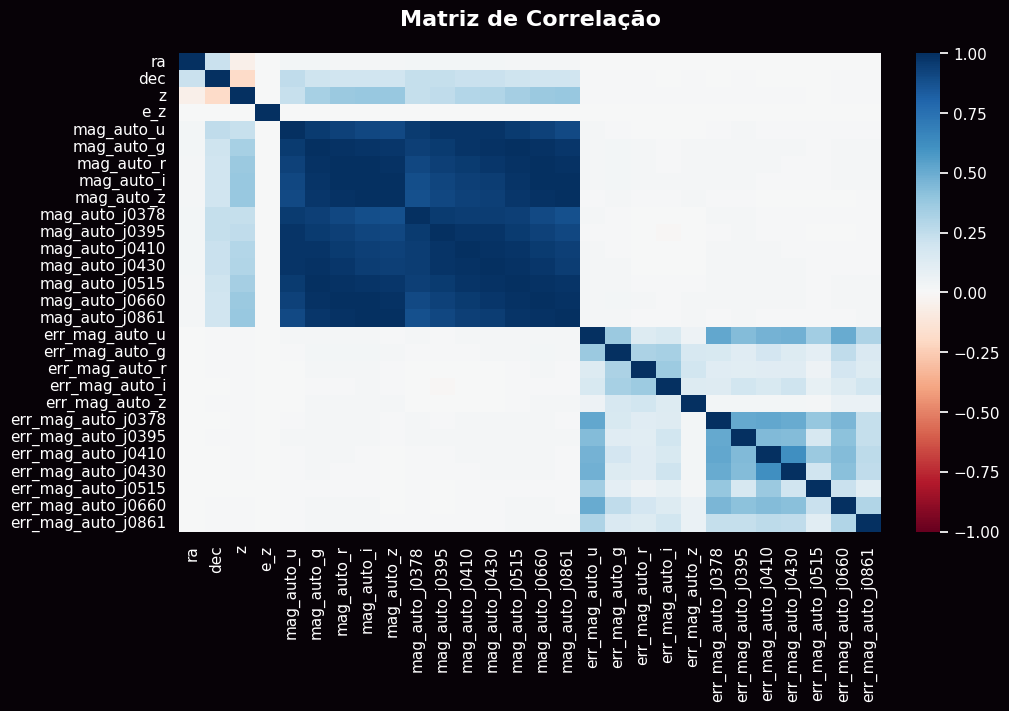

In [16]:
df_cor = pd.read_parquet("./data/photoz_main_mice.parquet", engine='pyarrow')
plt.figure(figsize=(10, 7))
df_cor = df_cor.drop(columns=['id'])
matriz_corr = df_cor.corr().round(2)
sns.heatmap(matriz_corr, cmap = 'RdBu', vmin=-1, vmax=1)
plt.title('Matriz de Correlação', fontsize=16, fontweight='bold', pad=20)
save_figure('correlacao_col')
plt.show();

✓ Figuras salvas: imagens/distribuicao_redshift.png (light e dark)


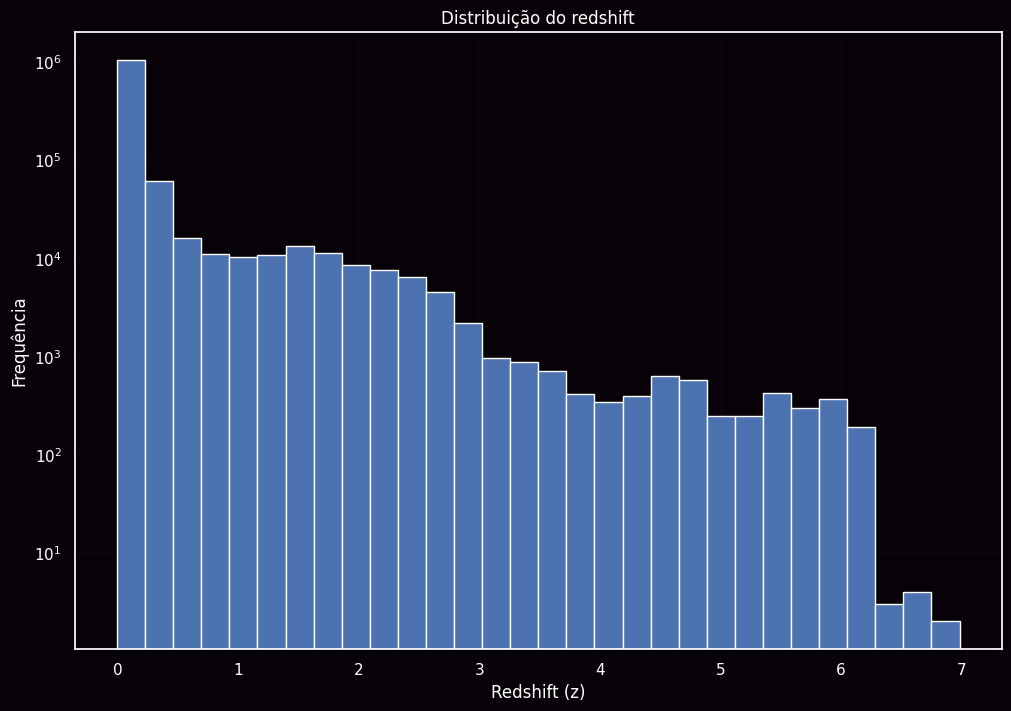

In [17]:
# Verificando a distribuição da variável alvo 'z'

plt.figure(figsize=(10, 7))
plt.hist(df['z'].dropna(), bins=30, log=True)
plt.title(f"Distribuição do redshift")
plt.grid(color='gray', linestyle='-', linewidth=0.1)
plt.ylabel("Frequência")
plt.xlabel("Redshift (z)")

save_figure('distribuicao_redshift')
plt.show()

## Treinamento ##

Antes do processo de treinamento, será feita mais uma filtragem nos dados, restringindo o conjunto de redshifts (z) utilizado ao intervalo [0,002, 3] (z<0,002 refere-se à estrelas, e z>3 há muita incerteza nas medidas). Além disso, os nomes das features do dataset serão renomeados e adicionadas novas features que representam a diferença entre as colunas de magnitude (i.e., as 'cores' fotométricas).

In [17]:
# Carregar dataset e preparar X, y
path_train_main_mice = "./data/photoz_main_mice.parquet"
train_main_mice = pd.read_parquet(path_train_main_mice, engine='pyarrow')

print(f"Tamanho original dos dados: {train_main_mice.shape}")
train_main_mice = train_main_mice.query("z >= 0.002 and z <= 3")
print(f"Tamanho após filtro de redshift: {train_main_mice.shape}")

df_with_colors = train_main_mice.copy()

# Mapeamento de nomes para as colunas reais
mag_map = {
    'U': 'mag_auto_u',
    'G': 'mag_auto_g',
    'R': 'mag_auto_r',
    'I': 'mag_auto_i',
    'Z': 'mag_auto_z',
    'F378': 'mag_auto_j0378',
    'F395': 'mag_auto_j0395',
    'F410': 'mag_auto_j0410',
    'F430': 'mag_auto_j0430',
    'F515': 'mag_auto_j0515',
    'F660': 'mag_auto_j0660',
    'F861': 'mag_auto_j0861'
}

# Lista de cores desejadas
color_names = [
    "U-F378", "U-F395", "U-F410", "U-F430", "U-G", "U-F515", "U-R", "U-F660", "U-I", "U-F861", "U-Z",
    "F378-F395", "F378-F410", "F378-F430", "F378-G", "F378-F515", "F378-R", "F378-F660", "F378-I", "F378-F861", "F378-Z",
    "F395-F410", "F395-F430", "F395-G", "F395-F515", "F395-R", "F395-F660", "F395-I", "F395-F861", "F395-Z",
    "F410-F430", "F410-G", "F410-F515", "F410-R", "F410-F660", "F410-I", "F410-F861", "F410-Z",
    "F430-G", "F430-F515", "F430-R", "F430-F660", "F430-I", "F430-F861", "F430-Z",
    "G-F515", "G-R", "G-F660", "G-I", "G-F861", "G-Z",
    "F515-R", "F515-F660", "F515-I", "F515-F861", "F515-Z",
    "R-F660", "R-I", "R-F861", "R-Z",
    "F660-I", "F660-F861", "F660-Z",
    "I-F861", "I-Z",
    "F861-Z"
]

for color_name in color_names:
    # Separar os dois filtros (ex: "U-F378" -> "U" e "F378")
    mag1_name, mag2_name = color_name.split('-')

    # Pegar as colunas reais
    mag1_col = mag_map[mag1_name]
    mag2_col = mag_map[mag2_name]

    # Criar a cor (diferença entre magnitudes)
    df_with_colors[color_name] = df_with_colors[mag1_col] - df_with_colors[mag2_col]


X = df_with_colors[mags_auto+color_names].values
y = df_with_colors['z'].values

print(f"Dataset carregado: {train_main_mice.shape}")
print(f"Verificar NaNs: {train_main_mice[mags_auto].isna().sum().sum()}")
print(f"\nX shape: {X.shape}, y shape: {y.shape}")
print(f"Redshift - Min: {y.min():.4f}, Max: {y.max():.4f}, Média: {y.mean():.4f}")


Tamanho original dos dados: (1216704, 29)
Tamanho após filtro de redshift: (499415, 29)
Dataset carregado: (499415, 29)
Verificar NaNs: 0

X shape: (499415, 78), y shape: (499415,)
Redshift - Min: 0.0020, Max: 2.9999, Média: 0.4108
Dataset carregado: (499415, 29)
Verificar NaNs: 0

X shape: (499415, 78), y shape: (499415,)
Redshift - Min: 0.0020, Max: 2.9999, Média: 0.4108


Após a filtragem, renomeação e adição das features, o conjunto será dividido em treino e teste. Na sequência, será aplicado o reescalonamento MinMaxScaler. Para evitar o vazamento de dados (data leakage), o scaler será ajustado (fit) somente no conjunto de treino e, então, utilizado para transformar ambos os conjuntos (treino e teste).

In [18]:
# Divisão treino/teste com estratificação

# Criar bins de redshift para estratificação
n_bins = 2000  # número de faixas
z_bins = pd.cut(y, bins=n_bins, labels=False)

# Train/test split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=SEED,
    stratify=z_bins  # Estratificar pelos bins
)

# Normalização
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("=" * 60)
print(f"Divisão estratificada: {len(X_train):,} treino - {len(X_test):,} teste")
print(f"({len(X_train)/len(X)*100:.1f}% / {len(X_test)/len(X)*100:.1f}%)")

# Verificar distribuição dos bins
print(f"\nDistribuição de redshift nos conjuntos:")
print(f"Treino - Min: {y_train.min():.4f}, Max: {y_train.max():.4f}, Média: {y_train.mean():.4f}")
print(f"Teste  - Min: {y_test.min():.4f}, Max: {y_test.max():.4f}, Média: {y_test.mean():.4f}")

# Salvar scaler
scaler_path = "./data/scaler.pkl"
joblib.dump(scaler, scaler_path)
print(f"\nScaler salvo: {scaler_path}")
print("=" * 60)

Divisão estratificada: 399,532 treino - 99,883 teste
(80.0% / 20.0%)

Distribuição de redshift nos conjuntos:
Treino - Min: 0.0020, Max: 2.9999, Média: 0.4108
Teste  - Min: 0.0020, Max: 2.9994, Média: 0.4108

Scaler salvo: ./data/scaler.pkl


### Modelo Baseline (Dummy Regressor)

Antes de treinar modelos complexos, é importante estabelecer uma linha de base (*baseline*) para comparação. O **DummyRegressor** é um modelo simples que sempre prevê o mesmo valor (neste caso, a média dos valores de treinamento), servindo como referência mínima de desempenho. Qualquer modelo real deve superar significativamente este baseline para ser considerado útil.

In [19]:
# Treinar Dummy Regressor (baseline)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("=" * 60)
print("MODELO BASELINE - DUMMY REGRESSOR")
print("=" * 60)

# Criar e treinar modelo dummy (prevê sempre a média)
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred_dummy = dummy_model.predict(X_test_scaled)

# Calcular métricas
mse_dummy = mean_squared_error(y_test, y_pred_dummy)
rmse_dummy = np.sqrt(mse_dummy)
mae_dummy = mean_absolute_error(y_test, y_pred_dummy)
r2_dummy = r2_score(y_test, y_pred_dummy)

# Métricas específicas de photo-z
bias_dummy = np.mean(y_pred_dummy - y_test)
dz_dummy = (y_pred_dummy - y_test) / (1 + y_test)
nmad_dummy = 1.4826 * np.median(np.abs(dz_dummy - np.median(dz_dummy)))
outliers_dummy = np.abs(dz_dummy) > 0.15
outlier_rate_dummy = (outliers_dummy.sum() / len(y_test)) * 100

print("\nMétricas do modelo baseline:")
print(f"  - MSE:  {mse_dummy:.6f}")
print(f"  - RMSE: {rmse_dummy:.6f}")
print(f"  - MAE:  {mae_dummy:.6f}")
print(f"  - R²:   {r2_dummy:.6f}")
print(f"\nMétricas específicas para Photo-z:")
print(f"  - Bias: {bias_dummy:.6f}")
print(f"  - NMAD (σ): {nmad_dummy:.6f}")
print(f"  - Outliers: {outlier_rate_dummy:.2f}%")
print("\n" + "=" * 60)
print("Este modelo serve como referência mínima.")
print("Modelos de ML devem superar significativamente estes resultados.")
print("=" * 60)

MODELO BASELINE - DUMMY REGRESSOR

Métricas do modelo baseline:
  - MSE:  0.380192
  - RMSE: 0.616597
  - MAE:  0.430755
  - R²:   -0.000000

Métricas específicas para Photo-z:
  - Bias: 0.000024
  - NMAD (σ): 0.132306
  - Outliers: 84.87%

Este modelo serve como referência mínima.
Modelos de ML devem superar significativamente estes resultados.


Para o treinamento, será utilizado o modelo Random Forest. Visando sua otimização, será empregado o Optuna para procurar o conjunto de hiperparâmetros que maximize a performance do modelo. Não foi utilizado o GridSearch, pois nesse caso não seria computacionalmente viável.

O Optuna consiste em um framework de otimização para modelos de ML, no qual é feita uma busca inteligente pela melhor combinação de hiperparâmetros. Esta busca utiliza um algoritmo de otimização Bayesiana chamado Tree-structured Parzen Estimator (TPE). Este método permite ao Optuna decidir entre a exploração (testar novas regiões do espaço de hiperparâmetros) e a explotação (refinar a busca em regiões que já se mostraram promissoras), guiando suas decisões pela maximização da função objetivo (neste caso, a acurácia).

In [20]:
# Otimização de Hiperparâmetros com Optuna
print("=" * 60)
print("OTIMIZAÇÃO DE HIPERPARÂMETROS COM OPTUNA - RANDOM FOREST")
print("=" * 60)

# Função objetivo para o Optuna
def objective(trial):
    # Sugerir hiperparâmetros
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 10, 40),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'random_state': SEED,
        'n_jobs': 30  # Leve para não travar o PC
    }

    # Criar modelo com os hiperparâmetros sugeridos
    rf = RandomForestRegressor(**params)

    # Cross-validation com 3 folds
    scores = cross_val_score(rf, X_train_scaled, y_train,
                              cv=3, scoring='neg_mean_squared_error', n_jobs=15)

    # Retornar a média do MSE (quanto menor, melhor)
    return scores.mean()

# Criar estudo Optuna com TPESampler (Bayesiano)
print("\nIniciando busca de hiperparâmetros com Optuna (TPE Sampler - Bayesiano)...")
print(f"  - Algoritmo: Tree-structured Parzen Estimator (TPE)")
print(f"  - Trials: 30 tentativas")
print(f"  - Warm-up: 10 trials aleatórios antes do TPE")
print("\nIsso pode demorar alguns minutos...")
print("=" * 60)

# Criar estudo com TPESampler otimizado
study = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(
        n_startup_trials=10,  # 10 trials aleatórios iniciais para exploração
        n_ei_candidates=24,   # Número de candidatos para Expected Improvement
        seed=SEED
    )
)

# Otimizar com mais trials para o TPE aprender melhor
study.optimize(objective, n_trials=15, show_progress_bar=True)

[I 2025-11-17 13:50:21,182] A new study created in memory with name: no-name-ceb6abb0-cfbc-4715-a20d-af13ef42cc35


OTIMIZAÇÃO DE HIPERPARÂMETROS COM OPTUNA - RANDOM FOREST

Iniciando busca de hiperparâmetros com Optuna (TPE Sampler - Bayesiano)...
  - Algoritmo: Tree-structured Parzen Estimator (TPE)
  - Trials: 30 tentativas
  - Warm-up: 10 trials aleatórios antes do TPE

Isso pode demorar alguns minutos...


Best trial: 0. Best value: -0.132884:   7%|▋         | 1/15 [01:22<19:17, 82.68s/it]

[I 2025-11-17 13:51:43,857] Trial 0 finished with value: -0.13288379913123075 and parameters: {'n_estimators': 317, 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.13288379913123075.


Best trial: 0. Best value: -0.132884:  13%|█▎        | 2/15 [01:43<10:03, 46.40s/it]

[I 2025-11-17 13:52:04,866] Trial 1 finished with value: -0.1418492955008881 and parameters: {'n_estimators': 141, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 0 with value: -0.13288379913123075.


Best trial: 0. Best value: -0.132884:  20%|██        | 3/15 [02:23<08:39, 43.28s/it]

[I 2025-11-17 13:52:44,436] Trial 2 finished with value: -0.13682514189850645 and parameters: {'n_estimators': 195, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.13288379913123075.


Best trial: 3. Best value: -0.132864:  27%|██▋       | 4/15 [04:25<13:39, 74.54s/it]

[I 2025-11-17 13:54:46,898] Trial 3 finished with value: -0.13286445079845516 and parameters: {'n_estimators': 484, 'max_depth': 40, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 3 with value: -0.13286445079845516.


Best trial: 3. Best value: -0.132864:  33%|███▎      | 5/15 [04:45<09:08, 54.85s/it]

[I 2025-11-17 13:55:06,823] Trial 4 finished with value: -0.13684791145674705 and parameters: {'n_estimators': 116, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 3 with value: -0.13286445079845516.


Best trial: 3. Best value: -0.132864:  40%|████      | 6/15 [05:19<07:08, 47.60s/it]

[I 2025-11-17 13:55:40,358] Trial 5 finished with value: -0.14083976128022244 and parameters: {'n_estimators': 198, 'max_depth': 13, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 3 with value: -0.13286445079845516.


Best trial: 3. Best value: -0.132864:  47%|████▋     | 7/15 [05:38<05:08, 38.52s/it]

[I 2025-11-17 13:56:00,168] Trial 6 finished with value: -0.13415998945253652 and parameters: {'n_estimators': 101, 'max_depth': 27, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 3 with value: -0.13286445079845516.


Best trial: 3. Best value: -0.132864:  53%|█████▎    | 8/15 [07:08<06:23, 54.72s/it]

[I 2025-11-17 13:57:29,574] Trial 7 finished with value: -0.1338223863342696 and parameters: {'n_estimators': 469, 'max_depth': 40, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 3 with value: -0.13286445079845516.


Best trial: 3. Best value: -0.132864:  60%|██████    | 9/15 [08:05<05:32, 55.45s/it]

[I 2025-11-17 13:58:26,631] Trial 8 finished with value: -0.13320286632303413 and parameters: {'n_estimators': 307, 'max_depth': 32, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 3 with value: -0.13286445079845516.


Best trial: 3. Best value: -0.132864:  67%|██████▋   | 10/15 [08:43<04:11, 50.23s/it]

[I 2025-11-17 13:59:05,161] Trial 9 finished with value: -0.1343835910538034 and parameters: {'n_estimators': 177, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 3 with value: -0.13286445079845516.


Best trial: 3. Best value: -0.132864:  73%|███████▎  | 11/15 [10:53<04:57, 74.49s/it]

[I 2025-11-17 14:01:14,676] Trial 10 finished with value: -0.1333855434655135 and parameters: {'n_estimators': 499, 'max_depth': 37, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 3 with value: -0.13286445079845516.


Best trial: 3. Best value: -0.132864:  80%|████████  | 12/15 [12:30<04:04, 81.42s/it]

[I 2025-11-17 14:02:51,958] Trial 11 finished with value: -0.132898741275781 and parameters: {'n_estimators': 388, 'max_depth': 33, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 3 with value: -0.13286445079845516.


Best trial: 3. Best value: -0.132864:  87%|████████▋ | 13/15 [13:53<02:43, 81.90s/it]

[I 2025-11-17 14:04:14,939] Trial 12 finished with value: -0.13290553151388831 and parameters: {'n_estimators': 342, 'max_depth': 28, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 3 with value: -0.13286445079845516.


Best trial: 3. Best value: -0.132864:  93%|█████████▎| 14/15 [15:37<01:28, 88.60s/it]

[I 2025-11-17 14:05:59,027] Trial 13 finished with value: -0.13351197166735473 and parameters: {'n_estimators': 403, 'max_depth': 35, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 3 with value: -0.13286445079845516.


Best trial: 14. Best value: -0.132848: 100%|██████████| 15/15 [16:46<00:00, 67.10s/it]

[I 2025-11-17 14:07:07,652] Trial 14 finished with value: -0.13284825007224638 and parameters: {'n_estimators': 260, 'max_depth': 40, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 14 with value: -0.13284825007224638.


In [21]:
# Resultados da otimização e treinar melhor modelo
print("\n" + "=" * 60)
print("RESULTADOS DA OTIMIZAÇÃO")
print("=" * 60)

# Melhores hiperparâmetros encontrados
best_params = study.best_params
print(f"\nMelhores hiperparâmetros encontrados:")
for param, value in best_params.items():
    print(f"  - {param}: {value}")

print(f"\nMelhor score (CV): {-study.best_value:.6f} (MSE)")
print(f"RMSE (CV): {np.sqrt(-study.best_value):.6f}")

# Treinar modelo final com os melhores hiperparâmetros
best_params['random_state'] = SEED
best_params['n_jobs'] = 35  # Manter leve
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train_scaled, y_train)
# best_rf = RandomForestRegressor(n_estimators=389, max_depth=32, min_samples_split=4, min_samples_leaf=3, max_features='sqrt', n_jobs=30)

# Salvar o melhor modelo
model_path = "./data/best_rf_model.pkl"
joblib.dump(best_rf, model_path)
print(f"\n✓ Melhor modelo treinado e salvo em: {model_path}")
print("=" * 60)


RESULTADOS DA OTIMIZAÇÃO

Melhores hiperparâmetros encontrados:
  - n_estimators: 260
  - max_depth: 40
  - min_samples_split: 5
  - min_samples_leaf: 2
  - max_features: sqrt

Melhor score (CV): 0.132848 (MSE)
RMSE (CV): 0.364484

✓ Melhor modelo treinado e salvo em: ./data/best_rf_model.pkl

✓ Melhor modelo treinado e salvo em: ./data/best_rf_model.pkl


### Modelo de Deep Learning (Rede Neural com PyTorch)

Para comparação com o Random Forest, será treinada uma rede neural profunda (Deep Neural Network - DNN) utilizando **PyTorch**. Redes neurais são capazes de aprender representações não-lineares complexas dos dados através de múltiplas camadas de neurônios.

#### Arquitetura da Rede

A arquitetura escolhida consiste em:
- **Camadas densas** (fully connected) com ativação ReLU
- **Batch Normalization** para estabilizar o treinamento
- **Dropout** para prevenir overfitting
- **Redução gradual** do número de neurônios (arquitetura em funil)

#### Estratégias de Treinamento

1. **Early Stopping**: Para o treinamento quando a perda de validação não melhora
2. **Learning Rate Scheduler**: Reduz a taxa de aprendizado quando a perda estagnar
3. **Model Checkpoint**: Salva o melhor modelo durante o treinamento

In [22]:
# Preparar dados para Deep Learning (dividir treino em treino + validação)
print("=" * 60)
print("PREPARAÇÃO DOS DADOS PARA DEEP LEARNING")
print("=" * 60)

# Dividir o conjunto de treino em treino e validação (80/20)
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(
    X_train_scaled, y_train,
    test_size=0.2,
    random_state=SEED
)

print(f"Conjunto de treino (DNN): {X_train_nn.shape[0]:,} amostras")
print(f"Conjunto de validação (DNN): {X_val_nn.shape[0]:,} amostras")
print(f"Conjunto de teste: {X_test_scaled.shape[0]:,} amostras")
print(f"\nDistribuição de redshift:")
print(f"  Treino    - Min: {y_train_nn.min():.4f}, Max: {y_train_nn.max():.4f}, Média: {y_train_nn.mean():.4f}")
print(f"  Validação - Min: {y_val_nn.min():.4f}, Max: {y_val_nn.max():.4f}, Média: {y_val_nn.mean():.4f}")
print(f"  Teste     - Min: {y_test.min():.4f}, Max: {y_test.max():.4f}, Média: {y_test.mean():.4f}")
print("=" * 60)

PREPARAÇÃO DOS DADOS PARA DEEP LEARNING
Conjunto de treino (DNN): 319,625 amostras
Conjunto de validação (DNN): 79,907 amostras
Conjunto de teste: 99,883 amostras

Distribuição de redshift:
  Treino    - Min: 0.0020, Max: 2.9999, Média: 0.4096
  Validação - Min: 0.0020, Max: 2.9998, Média: 0.4159
  Teste     - Min: 0.0020, Max: 2.9994, Média: 0.4108


In [8]:
# Construir arquitetura da rede neural com PyTorch
print("=" * 60)
print("CONSTRUINDO ARQUITETURA DA REDE NEURAL (PyTorch)")
print("=" * 60)

# Definir arquitetura da rede
class PhotozNet(nn.Module):
    def __init__(self, n_features):
        super(PhotozNet, self).__init__()
        
        # Camada 1
        self.fc1 = nn.Linear(n_features, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.3)
        
        # Camada 2
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.3)
        
        # Camada 3
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.dropout3 = nn.Dropout(0.2)
        
        # Camada 4
        self.fc4 = nn.Linear(64, 32)
        self.bn4 = nn.BatchNorm1d(32)
        self.dropout4 = nn.Dropout(0.2)
        
        # Camada de saída
        self.fc5 = nn.Linear(32, 1)
        
        # Ativação
        self.relu = nn.ReLU()
    
    def forward(self, x):
        # Camada 1
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        
        # Camada 2
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        
        # Camada 3
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.dropout3(x)
        
        # Camada 4
        x = self.fc4(x)
        x = self.bn4(x)
        x = self.relu(x)
        x = self.dropout4(x)
        
        # Saída
        x = self.fc5(x)
        return x

# Criar modelo
n_features = X_train_nn.shape[1]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_dnn = PhotozNet(n_features).to(device)

print(f"\nDispositivo: {device}")
print(f"\nArquitetura da Rede Neural:")
print(model_dnn)
print(f"\nTotal de parâmetros: {sum(p.numel() for p in model_dnn.parameters()):,}")
print("=" * 60)

CONSTRUINDO ARQUITETURA DA REDE NEURAL (PyTorch)

Dispositivo: cuda

Arquitetura da Rede Neural:
PhotozNet(
  (fc1): Linear(in_features=78, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=64, out_features=32, bias=True)
  (bn4): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout4): Dropout(p=0.2, inplace=False)
  (fc5): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)

Total de parâmetros: 64,449

Dispos

In [10]:
# Treinar rede neural com PyTorch
print("=" * 60)
print("TREINANDO REDE NEURAL")
print("=" * 60)

# Criar diretório se não existir
os.makedirs('./data', exist_ok=True)

# Converter dados para tensores PyTorch
X_train_tensor = torch.FloatTensor(X_train_nn).to(device)
y_train_tensor = torch.FloatTensor(y_train_nn).reshape(-1, 1).to(device)
X_val_tensor = torch.FloatTensor(X_val_nn).to(device)
y_val_tensor = torch.FloatTensor(y_val_nn).reshape(-1, 1).to(device)

# Criar DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

batch_size = 512
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Configurar otimizador e loss
criterion = nn.MSELoss()
optimizer = optim.Adam(model_dnn.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

# Variáveis para controle de treinamento
num_epochs = 100
patience = 15
best_val_loss = float('inf')
patience_counter = 0
history = {'loss': [], 'val_loss': [], 'mae': [], 'val_mae': []}

print("\nIniciando treinamento...")
print("Estratégias ativas:")
print("  - Early Stopping (patience=15)")
print("  - ReduceLROnPlateau (patience=5, factor=0.5)")
print("  - Model Checkpoint (salva melhor modelo)")
print("\n" + "=" * 60)

# Loop de treinamento
for epoch in range(num_epochs):
    # Modo treino
    model_dnn.train()
    train_loss = 0.0
    train_mae = 0.0
    
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model_dnn(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * batch_X.size(0)
        train_mae += torch.mean(torch.abs(outputs - batch_y)).item() * batch_X.size(0)
    
    train_loss /= len(train_loader.dataset)
    train_mae /= len(train_loader.dataset)
    
    # Modo avaliação
    model_dnn.eval()
    val_loss = 0.0
    val_mae = 0.0
    
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model_dnn(batch_X)
            loss = criterion(outputs, batch_y)
            
            val_loss += loss.item() * batch_X.size(0)
            val_mae += torch.mean(torch.abs(outputs - batch_y)).item() * batch_X.size(0)
    
    val_loss /= len(val_loader.dataset)
    val_mae /= len(val_loader.dataset)
    
    # Salvar histórico
    history['loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['mae'].append(train_mae)
    history['val_mae'].append(val_mae)
    
    # Atualizar learning rate
    scheduler.step(val_loss)
    
    # Print progresso
    if (epoch + 1) % 5 == 0:
        print(f"Época [{epoch+1}/{num_epochs}] - "
              f"Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}, "
              f"MAE: {train_mae:.6f}, Val MAE: {val_mae:.6f}")
    
    # Early stopping e checkpoint
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        # Salvar melhor modelo
        torch.save(model_dnn.state_dict(), './data/best_dnn_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"\nEarly stopping na época {epoch+1}")
            break

# Carregar melhor modelo
model_dnn.load_state_dict(torch.load('./data/best_dnn_model.pth'))

print("\n" + "=" * 60)
print("TREINAMENTO CONCLUÍDO")
print("=" * 60)
print(f"Total de épocas: {len(history['loss'])}")
print(f"Melhor val_loss: {min(history['val_loss']):.6f}")
print(f"Melhor val_mae: {min(history['val_mae']):.6f}")
print("=" * 60)

TREINANDO REDE NEURAL

Iniciando treinamento...
Estratégias ativas:
  - Early Stopping (patience=15)
  - ReduceLROnPlateau (patience=5, factor=0.5)
  - Model Checkpoint (salva melhor modelo)



Época [5/100] - Loss: 0.150596, Val Loss: 0.193549, MAE: 0.194287, Val MAE: 0.200346
Época [10/100] - Loss: 0.143464, Val Loss: 0.144156, MAE: 0.188671, Val MAE: 0.198784
Época [10/100] - Loss: 0.143464, Val Loss: 0.144156, MAE: 0.188671, Val MAE: 0.198784
Época [15/100] - Loss: 0.140263, Val Loss: 0.141985, MAE: 0.185572, Val MAE: 0.181062
Época [15/100] - Loss: 0.140263, Val Loss: 0.141985, MAE: 0.185572, Val MAE: 0.181062
Época [20/100] - Loss: 0.138441, Val Loss: 0.142075, MAE: 0.184245, Val MAE: 0.189330
Época [20/100] - Loss: 0.138441, Val Loss: 0.142075, MAE: 0.184245, Val MAE: 0.189330
Época [25/100] - Loss: 0.137499, Val Loss: 0.154824, MAE: 0.183195, Val MAE: 0.177034
Época [25/100] - Loss: 0.137499, Val Loss: 0.154824, MAE: 0.183195, Val MAE: 0.177034
Época [30/100] - Loss: 0.135186, Val Loss: 0.129297, MAE: 0.180803, Val MAE: 0.169444
Época [30/100] - Loss: 0.135186, Val Loss: 0.129297, MAE: 0.180803, Val MAE: 0.169444
Época [35/100] - Loss: 0.134735, Val Loss: 0.129660, MA

✓ Figuras salvas: imagens/dnn_training_curves.png (light e dark)


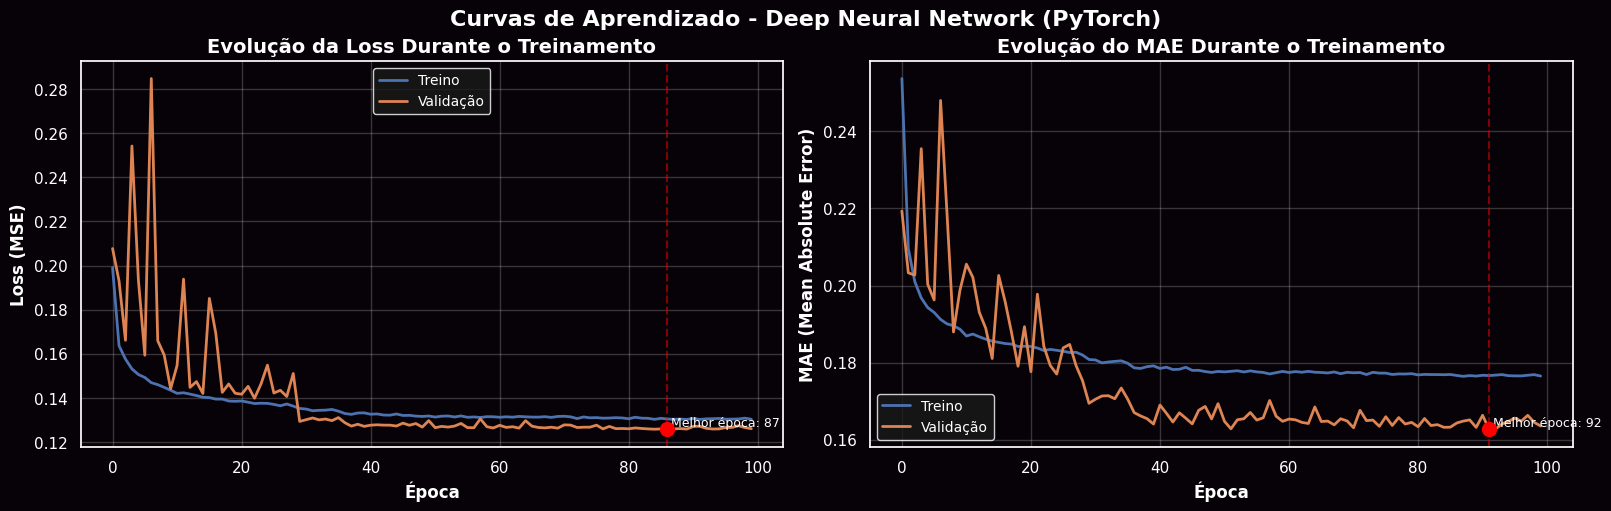


ANÁLISE DE OVERFITTING
Loss final (treino): 0.130290
Loss final (validação): 0.126002
Gap (val - train): -0.004288

✓ Sem sinais significativos de overfitting


In [11]:
# Visualizar evolução do treinamento
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Loss (MSE)
ax = axes[0]
ax.plot(history['loss'], label='Treino', linewidth=2)
ax.plot(history['val_loss'], label='Validação', linewidth=2)
ax.set_xlabel('Época', fontsize=12, fontweight='bold')
ax.set_ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
ax.set_title('Evolução da Loss Durante o Treinamento', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Marcar melhor época
best_epoch = np.argmin(history['val_loss'])
best_val_loss = history['val_loss'][best_epoch]
ax.axvline(best_epoch, color='red', linestyle='--', alpha=0.5)
ax.scatter([best_epoch], [best_val_loss], color='red', s=100, zorder=5)
ax.text(best_epoch, best_val_loss, f' Melhor época: {best_epoch+1}', 
        fontsize=9, va='bottom')

# Plot 2: MAE
ax = axes[1]
ax.plot(history['mae'], label='Treino', linewidth=2)
ax.plot(history['val_mae'], label='Validação', linewidth=2)
ax.set_xlabel('Época', fontsize=12, fontweight='bold')
ax.set_ylabel('MAE (Mean Absolute Error)', fontsize=12, fontweight='bold')
ax.set_title('Evolução do MAE Durante o Treinamento', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Marcar melhor época
best_epoch_mae = np.argmin(history['val_mae'])
best_val_mae = history['val_mae'][best_epoch_mae]
ax.axvline(best_epoch_mae, color='red', linestyle='--', alpha=0.5)
ax.scatter([best_epoch_mae], [best_val_mae], color='red', s=100, zorder=5)
ax.text(best_epoch_mae, best_val_mae, f' Melhor época: {best_epoch_mae+1}',
        fontsize=9, va='bottom')

plt.suptitle('Curvas de Aprendizado - Deep Neural Network (PyTorch)', fontsize=16, fontweight='bold')
save_figure('dnn_training_curves')
plt.show()

# Análise de overfitting
final_train_loss = history['loss'][-1]
final_val_loss = history['val_loss'][-1]
gap = final_val_loss - final_train_loss

print("\n" + "=" * 60)
print("ANÁLISE DE OVERFITTING")
print("=" * 60)
print(f"Loss final (treino): {final_train_loss:.6f}")
print(f"Loss final (validação): {final_val_loss:.6f}")
print(f"Gap (val - train): {gap:.6f}")
if gap > 0.01:
    print("\n⚠️  Sinal de overfitting detectado (gap > 0.01)")
else:
    print("\n✓ Sem sinais significativos de overfitting")
print("=" * 60)

### Avaliação do Modelo DNN no Conjunto de Teste

Visualização detalhada do desempenho da rede neural no conjunto de teste.

In [33]:
# Fazer previsões do DNN no conjunto de teste
print("=" * 60)
print("AVALIAÇÃO DO MODELO DNN NO CONJUNTO DE TESTE")
print("=" * 60)

# Modo de avaliação
model_dnn.eval()

# Fazer previsões
with torch.no_grad():
    X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)
    y_pred_dnn = model_dnn(X_test_tensor).cpu().numpy().flatten()

# Calcular métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_dnn = mean_squared_error(y_test, y_pred_dnn)
rmse_dnn = np.sqrt(mse_dnn)
mae_dnn = mean_absolute_error(y_test, y_pred_dnn)
r2_dnn = r2_score(y_test, y_pred_dnn)

# Calcular bias
bias_dnn = np.mean(y_pred_dnn - y_test)

# Calcular scatter (desvio normalizado)
dz_dnn = (y_pred_dnn - y_test) / (1 + y_test)
nmad_dnn = 1.4826 * np.median(np.abs(dz_dnn - np.median(dz_dnn)))

print(f"Previsões realizadas: {len(y_pred_dnn)}")
print(f"\nMétricas gerais:")
print(f"  - MSE:  {mse_dnn:.6f}")
print(f"  - RMSE: {rmse_dnn:.6f}")
print(f"  - MAE:  {mae_dnn:.6f}")
print(f"  - R²:   {r2_dnn:.6f}")

print(f"\nMétricas específicas para Photo-z:")
print(f"  - Bias: {bias_dnn:.6f}")
print(f"  - NMAD (σ): {nmad_dnn:.6f}")

# Porcentagem de outliers (|Δz/(1+z)| > 0.15)
outlier_threshold = 0.15
outliers_dnn = np.abs(dz_dnn) > outlier_threshold
outlier_rate_dnn = (outliers_dnn.sum() / len(y_test)) * 100

print(f"\nOutliers (|Δz/(1+z)| > {outlier_threshold}):")
print(f"  - Quantidade: {outliers_dnn.sum()} / {len(y_test)}")
print(f"  - Taxa: {outlier_rate_dnn:.2f}%")
print("=" * 60)

AVALIAÇÃO DO MODELO DNN NO CONJUNTO DE TESTE
Previsões realizadas: 99883

Métricas gerais:
  - MSE:  0.123852
  - RMSE: 0.351926
  - MAE:  0.162309
  - R²:   0.674238

Métricas específicas para Photo-z:
  - Bias: -0.001018
  - NMAD (σ): 0.054196

Outliers (|Δz/(1+z)| > 0.15):
  - Quantidade: 16478 / 99883
  - Taxa: 16.50%


DNN - MSE: 0.123852  RMSE: 0.351926  MAE: 0.162309  R²: 0.6742
DNN - Bias: -0.001018  NMAD: 0.054196  Outliers (>0.15): 16.50%
✓ Figuras salvas: imagens/photoz_dnn_evaluation.png (light e dark)
✓ Figuras salvas: imagens/photoz_dnn_evaluation.png (light e dark)


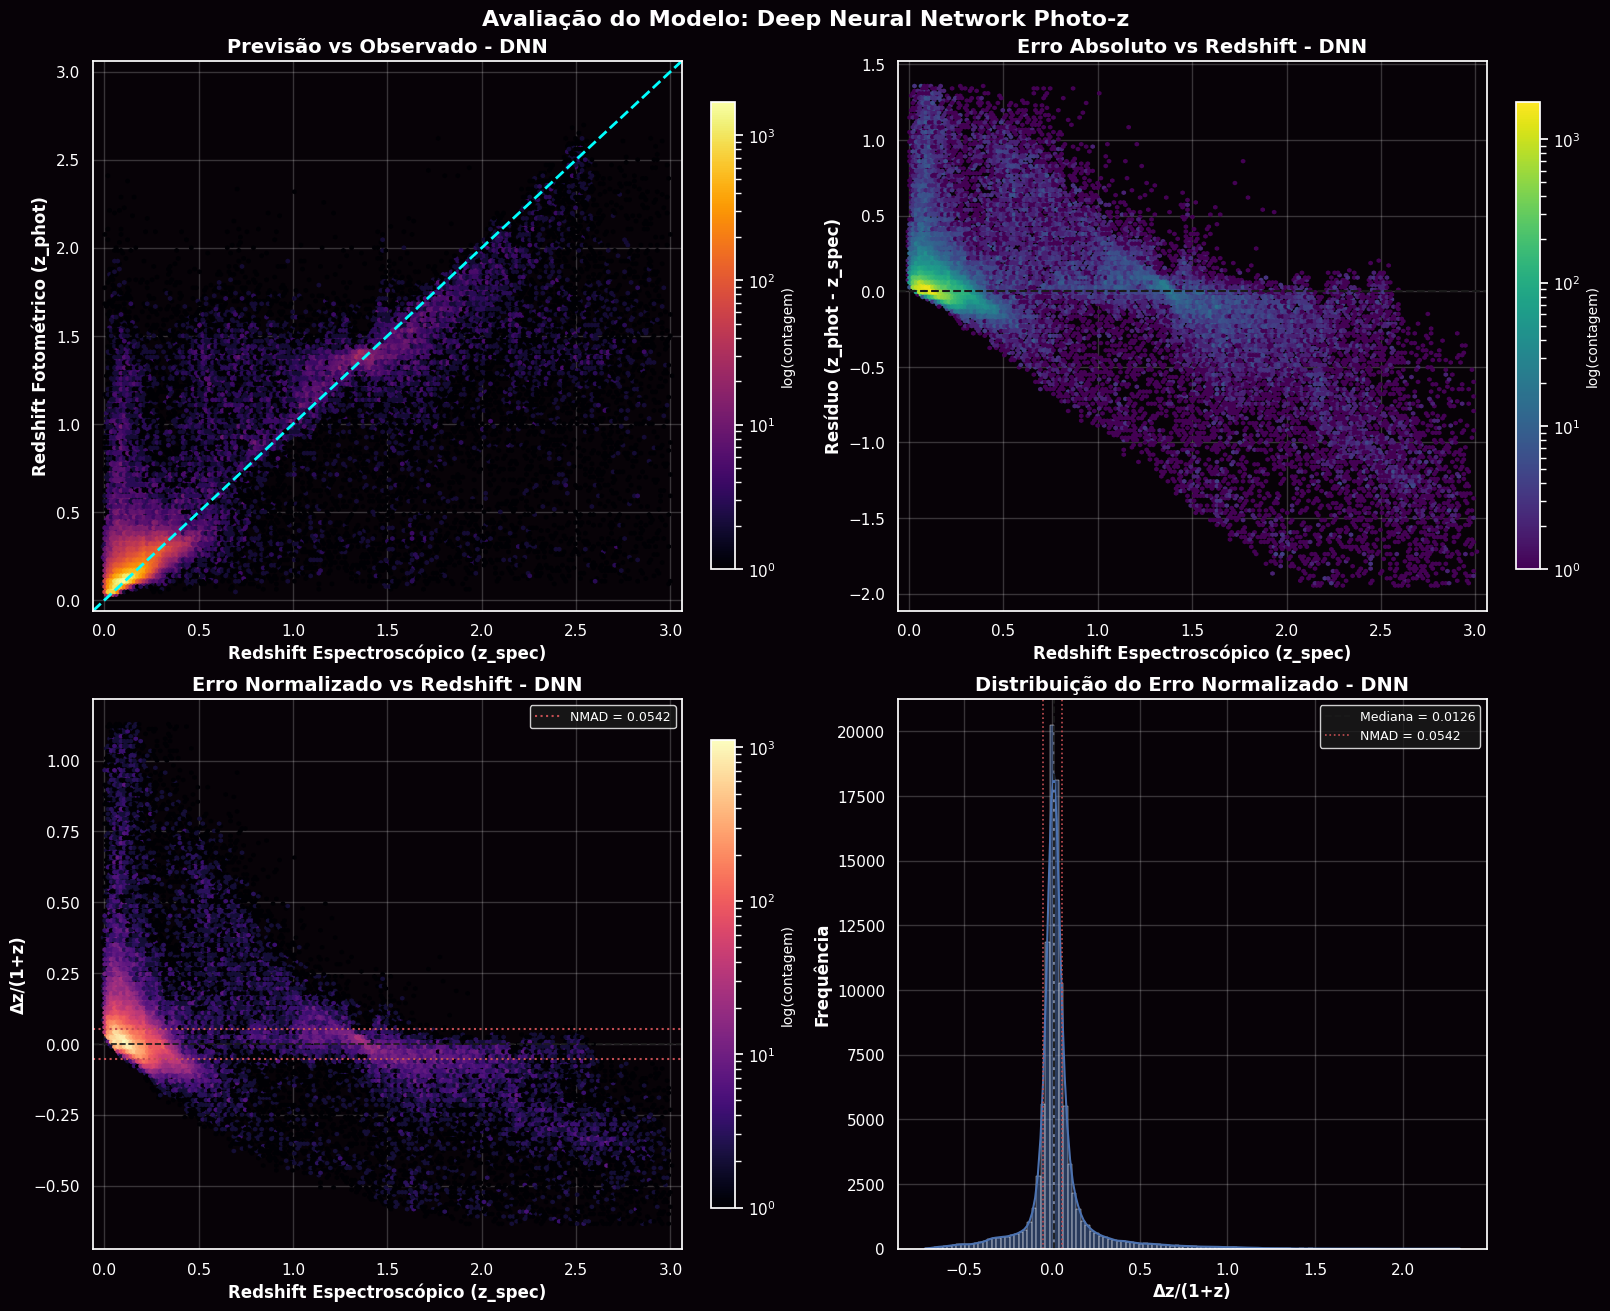

In [32]:
# Plots 2x2 de avaliação do DNN
# Calcular métricas rápidas para garantir consistência
residuals_dnn = y_pred_dnn - y_test
dz_dnn_plot = (y_pred_dnn - y_test) / (1 + y_test)
nmad_val_dnn = 1.4826 * np.median(np.abs(dz_dnn_plot - np.median(dz_dnn_plot)))
outlier_frac_dnn = (np.abs(dz_dnn_plot) > 0.15).mean() * 100

print(f"DNN - MSE: {mse_dnn:.6f}  RMSE: {rmse_dnn:.6f}  MAE: {mae_dnn:.6f}  R²: {r2_dnn:.4f}")
print(f"DNN - Bias: {bias_dnn:.6f}  NMAD: {nmad_val_dnn:.6f}  Outliers (>0.15): {outlier_frac_dnn:.2f}%")

# Usar todo o intervalo de z disponível (variável `y`) como eixo x
x_min = np.nanmin(y)
x_max = np.nanmax(y)
if not np.isfinite(x_min) or not np.isfinite(x_max) or x_max <= x_min:
    x_min, x_max = 0.0, 0.5

# pequeno padding para melhor visual
pad = 0.02 * (x_max - x_min) if (x_max - x_min) > 0 else 0.01
x0, x1 = x_min - pad, x_max + pad

fig, axes = plt.subplots(2, 2, figsize=(16, 13))
cmap = 'inferno'

# 1) z_spec vs z_phot (hexbin)
ax = axes[0, 0]
hb = ax.hexbin(y_test, y_pred_dnn, gridsize=180, bins='log', cmap=cmap, mincnt=1,
               extent=(x0, x1, x0, x1))
ax.plot([x0, x1], [x0, x1], ls='--', color='cyan', lw=2)
ax.set_xlim(x0, x1); ax.set_ylim(x0, x1)
ax.set_xlabel('Redshift Espectroscópico (z_spec)', fontsize=12, fontweight='bold')
ax.set_ylabel('Redshift Fotométrico (z_phot)', fontsize=12, fontweight='bold')
ax.set_title('Previsão vs Observado - DNN', fontsize=14, fontweight='bold')
cb = fig.colorbar(hb, ax=ax, shrink=0.85)
cb.set_label('log(contagem)', fontsize=10)

# 2) Resíduos vs z_spec
ax = axes[0, 1]
res_low, res_high = np.nanpercentile(residuals_dnn, [0.5, 99.5])
res_pad = 0.05 * (res_high - res_low) if (res_high - res_low) > 0 else 0.01
hb2 = ax.hexbin(y_test, residuals_dnn, gridsize=180, bins='log', cmap='viridis', mincnt=1,
                extent=(x0, x1, res_low - res_pad, res_high + res_pad))
ax.axhline(0, color='k', ls='--', lw=1.5)
ax.set_xlim(x0, x1)
ax.set_xlabel('Redshift Espectroscópico (z_spec)', fontsize=12, fontweight='bold')
ax.set_ylabel('Resíduo (z_phot - z_spec)', fontsize=12, fontweight='bold')
ax.set_title('Erro Absoluto vs Redshift - DNN', fontsize=14, fontweight='bold')
cb2 = fig.colorbar(hb2, ax=ax, shrink=0.85)
cb2.set_label('log(contagem)', fontsize=10)

# 3) Δz/(1+z) vs z_spec
ax = axes[1, 0]
dz_low, dz_high = np.nanpercentile(dz_dnn_plot, [0.5, 99.5])
dz_pad = 0.05 * (dz_high - dz_low) if (dz_high - dz_low) > 0 else 0.01
hb3 = ax.hexbin(y_test, dz_dnn_plot, gridsize=180, bins='log', cmap='magma', mincnt=1,
                extent=(x0, x1, dz_low - dz_pad, dz_high + dz_pad))
ax.axhline(0, color='k', ls='--', lw=1.2)
ax.set_xlim(x0, x1)
ax.set_xlabel('Redshift Espectroscópico (z_spec)', fontsize=12, fontweight='bold')
ax.set_ylabel('Δz/(1+z)', fontsize=12, fontweight='bold')
ax.set_title('Erro Normalizado vs Redshift - DNN', fontsize=14, fontweight='bold')
cb3 = fig.colorbar(hb3, ax=ax, shrink=0.85)
cb3.set_label('log(contagem)', fontsize=10)
# adicionar linhas de ±NMAD
ax.axhline(nmad_val_dnn, color='r', ls=':', lw=1.5, label=f'NMAD = {nmad_val_dnn:.4f}')
ax.axhline(-nmad_val_dnn, color='r', ls=':', lw=1.5)
ax.legend(loc='upper right', fontsize=9)

# 4) Histograma de Δz/(1+z)
ax = axes[1, 1]
sns.histplot(dz_dnn_plot, bins=120, kde=True, stat='count', color='#4c72b0', ax=ax)
ax.set_xlabel('Δz/(1+z)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequência', fontsize=12, fontweight='bold')
ax.set_title('Distribuição do Erro Normalizado - DNN', fontsize=14, fontweight='bold')
ax.axvline(np.median(dz_dnn_plot), color='k', ls='--', lw=1.3, label=f'Mediana = {np.median(dz_dnn_plot):.4f}')
ax.axvline(nmad_val_dnn, color='r', ls=':', lw=1.2, label=f'NMAD = {nmad_val_dnn:.4f}')
ax.axvline(-nmad_val_dnn, color='r', ls=':', lw=1.2)
ax.legend(fontsize=9)

plt.suptitle('Avaliação do Modelo: Deep Neural Network Photo-z', fontsize=16, fontweight='bold')

save_figure('photoz_dnn_evaluation')
plt.show()

## Avaliar o modelo

Modelo com os hiperparâmetros otimizados.

In [23]:
# Carregar modelo, scaler e dados de teste
print("=" * 60)
print("CARREGANDO MODELO E DADOS PARA AVALIAÇÃO")
print("=" * 60)

# Carregar dataset completo
path_train_main_mice = "./data/photoz_main_mice.parquet"
train_main_mice = pd.read_parquet(path_train_main_mice, engine='pyarrow')

# Filtro de redshift
train_main_mice = train_main_mice.query("z >= 0.002 and z <= 3")

# Criar features (magnitudes + cores)
df_with_colors = train_main_mice.copy()

mag_map = {
    'U': 'mag_auto_u', 'G': 'mag_auto_g', 'R': 'mag_auto_r', 'I': 'mag_auto_i', 'Z': 'mag_auto_z',
    'F378': 'mag_auto_j0378', 'F395': 'mag_auto_j0395', 'F410': 'mag_auto_j0410', 'F430': 'mag_auto_j0430',
    'F515': 'mag_auto_j0515', 'F660': 'mag_auto_j0660', 'F861': 'mag_auto_j0861'
}

color_names = [
    "U-F378", "U-F395", "U-F410", "U-F430", "U-G", "U-F515", "U-R", "U-F660", "U-I", "U-F861", "U-Z",
    "F378-F395", "F378-F410", "F378-F430", "F378-G", "F378-F515", "F378-R", "F378-F660", "F378-I", "F378-F861", "F378-Z",
    "F395-F410", "F395-F430", "F395-G", "F395-F515", "F395-R", "F395-F660", "F395-I", "F395-F861", "F395-Z",
    "F410-F430", "F410-G", "F410-F515", "F410-R", "F410-F660", "F410-I", "F410-F861", "F410-Z",
    "F430-G", "F430-F515", "F430-R", "F430-F660", "F430-I", "F430-F861", "F430-Z",
    "G-F515", "G-R", "G-F660", "G-I", "G-F861", "G-Z",
    "F515-R", "F515-F660", "F515-I", "F515-F861", "F515-Z",
    "R-F660", "R-I", "R-F861", "R-Z",
    "F660-I", "F660-F861", "F660-Z",
    "I-F861", "I-Z", "F861-Z"
]

for color_name in color_names:
    mag1_name, mag2_name = color_name.split('-')
    mag1_col, mag2_col = mag_map[mag1_name], mag_map[mag2_name]
    df_with_colors[color_name] = df_with_colors[mag1_col] - df_with_colors[mag2_col]

X = df_with_colors[mags_auto + color_names].values
y = df_with_colors['z'].values

# Divisão treino/teste (mesma estratificação do treinamento)
n_bins = 2000
z_bins = pd.cut(y, bins=n_bins, labels=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=z_bins)

# Carregar scaler e modelo
scaler = joblib.load("./data/scaler.pkl")
best_rf = joblib.load("./data/best_rf_model.pkl")

# Normalizar dados de teste
X_test_scaled = scaler.transform(X_test)

print(f"✓ Modelo carregado: {best_rf.__class__.__name__}")
print(f"✓ Scaler carregado: {scaler.__class__.__name__}")
print(f"✓ Dados de teste: {X_test.shape[0]:,} amostras, {X_test.shape[1]} features")
print("=" * 60)

CARREGANDO MODELO E DADOS PARA AVALIAÇÃO


✓ Modelo carregado: RandomForestRegressor
✓ Scaler carregado: MinMaxScaler
✓ Dados de teste: 99,883 amostras, 78 features


In [24]:
# Fazer previsões no conjunto de teste
y_pred = best_rf.predict(X_test_scaled)

print("=" * 60)
print("PREVISÕES NO CONJUNTO DE TESTE")
print("=" * 60)
print(f"Previsões realizadas: {len(y_pred)}")
print(f"\nRedshift previsto (z_pred):")
print(f"  - Min: {y_pred.min():.4f}")
print(f"  - Max: {y_pred.max():.4f}")
print(f"  - Média: {y_pred.mean():.4f}")
print(f"  - Std: {y_pred.std():.4f}")
print("=" * 60)

PREVISÕES NO CONJUNTO DE TESTE
Previsões realizadas: 99883

Redshift previsto (z_pred):
  - Min: 0.0094
  - Max: 2.5269
  - Média: 0.4165
  - Std: 0.4818


In [25]:
# Métricas de avaliação
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calcular bias
bias = np.mean(y_pred - y_test)

# Calcular scatter (desvio normalizado)
dz = (y_pred - y_test) / (1 + y_test)
nmad = 1.4826 * np.median(np.abs(dz - np.median(dz)))  # Normalized Median Absolute Deviation

print("=" * 60)
print("MÉTRICAS DE AVALIAÇÃO")
print("=" * 60)
print(f"\nMétricas gerais:")
print(f"  - MSE:  {mse:.6f}")
print(f"  - RMSE: {rmse:.6f}")
print(f"  - MAE:  {mae:.6f}")
print(f"  - R²:   {r2:.6f}")

print(f"\nMétricas específicas para Photo-z:")
print(f"  - Bias: {bias:.6f}")
print(f"  - NMAD (σ): {nmad:.6f}")

# Porcentagem de outliers (|Δz/(1+z)| > 0.15)
outlier_threshold = 0.15
outliers = np.abs(dz) > outlier_threshold
outlier_rate = (outliers.sum() / len(y_test)) * 100

print(f"\nOutliers (|Δz/(1+z)| > {outlier_threshold}):")
print(f"  - Quantidade: {outliers.sum()} / {len(y_test)}")
print(f"  - Taxa: {outlier_rate:.2f}%")
print("=" * 60)

MÉTRICAS DE AVALIAÇÃO

Métricas gerais:
  - MSE:  0.131274
  - RMSE: 0.362317
  - MAE:  0.174476
  - R²:   0.654717

Métricas específicas para Photo-z:
  - Bias: 0.005655
  - NMAD (σ): 0.054537

Outliers (|Δz/(1+z)| > 0.15):
  - Quantidade: 20086 / 99883
  - Taxa: 20.11%


A avaliação do desempenho do modelo será realizada por meio de um conjunto de métricas, divididas em métricas gerais de regressão e métricas específicas para a análise de *Photo-z*.

### Métricas Gerais

* **Mean Absolute Error (MAE):** Corresponde à média do módulo da diferença (erro absoluto) entre os valores reais e os previstos.
* **Mean Squared Error (MSE):** A média do quadrado dos erros. Esta métrica penaliza erros grandes de forma mais significativa que o MAE.
* **Root Mean Squared Error (RMSE):** A raiz quadrada do MSE. Expressa o erro médio na mesma unidade da variável-alvo (redshift), mas é mais sensível a outliers que o MAE.
* **Coeficiente de Determinação ($R^2$):** Mede a proporção da variância nos dados observados que é explicada pelo modelo. Um valor de 1 indica um ajuste perfeito, enquanto 0 indica que o modelo não é melhor que a média dos dados.

### Métricas Específicas para Photo-z

* **Bias:** Avalia a tendência sistemática (viés) do modelo, geralmente definida como o erro médio ($z_{previsto} - z_{real}$). Valores próximos de zero indicam um modelo imparcial, que não superestima ou subestima os valores de forma consistente.
* **Normalized Median Absolute Deviation (NMAD):** Um estimador robusto da dispersão (precisão) dos erros. Por ser baseado na mediana, não é significativamente afetado por outliers, fornecendo uma medida mais confiável da precisão do modelo para a maioria dos dados.

### Análise de Outliers

* Serão definidos como *outliers*  os pontos onde o erro normalizado for maior que 15%. Este erro é comumente calculado como:
    $$\frac{|z_{real} - z_{previsto}|}{(1 + z_{real})} > 0.15$$



MSE: 0.131274  RMSE: 0.362317  MAE: 0.174476  R²: 0.6547
Bias: 0.005655  NMAD: 0.054537  Outliers (>0.15): 20.11%
✓ Figuras salvas: imagens/photoz_rf_evaluation.png (light e dark)
✓ Figuras salvas: imagens/photoz_rf_evaluation.png (light e dark)


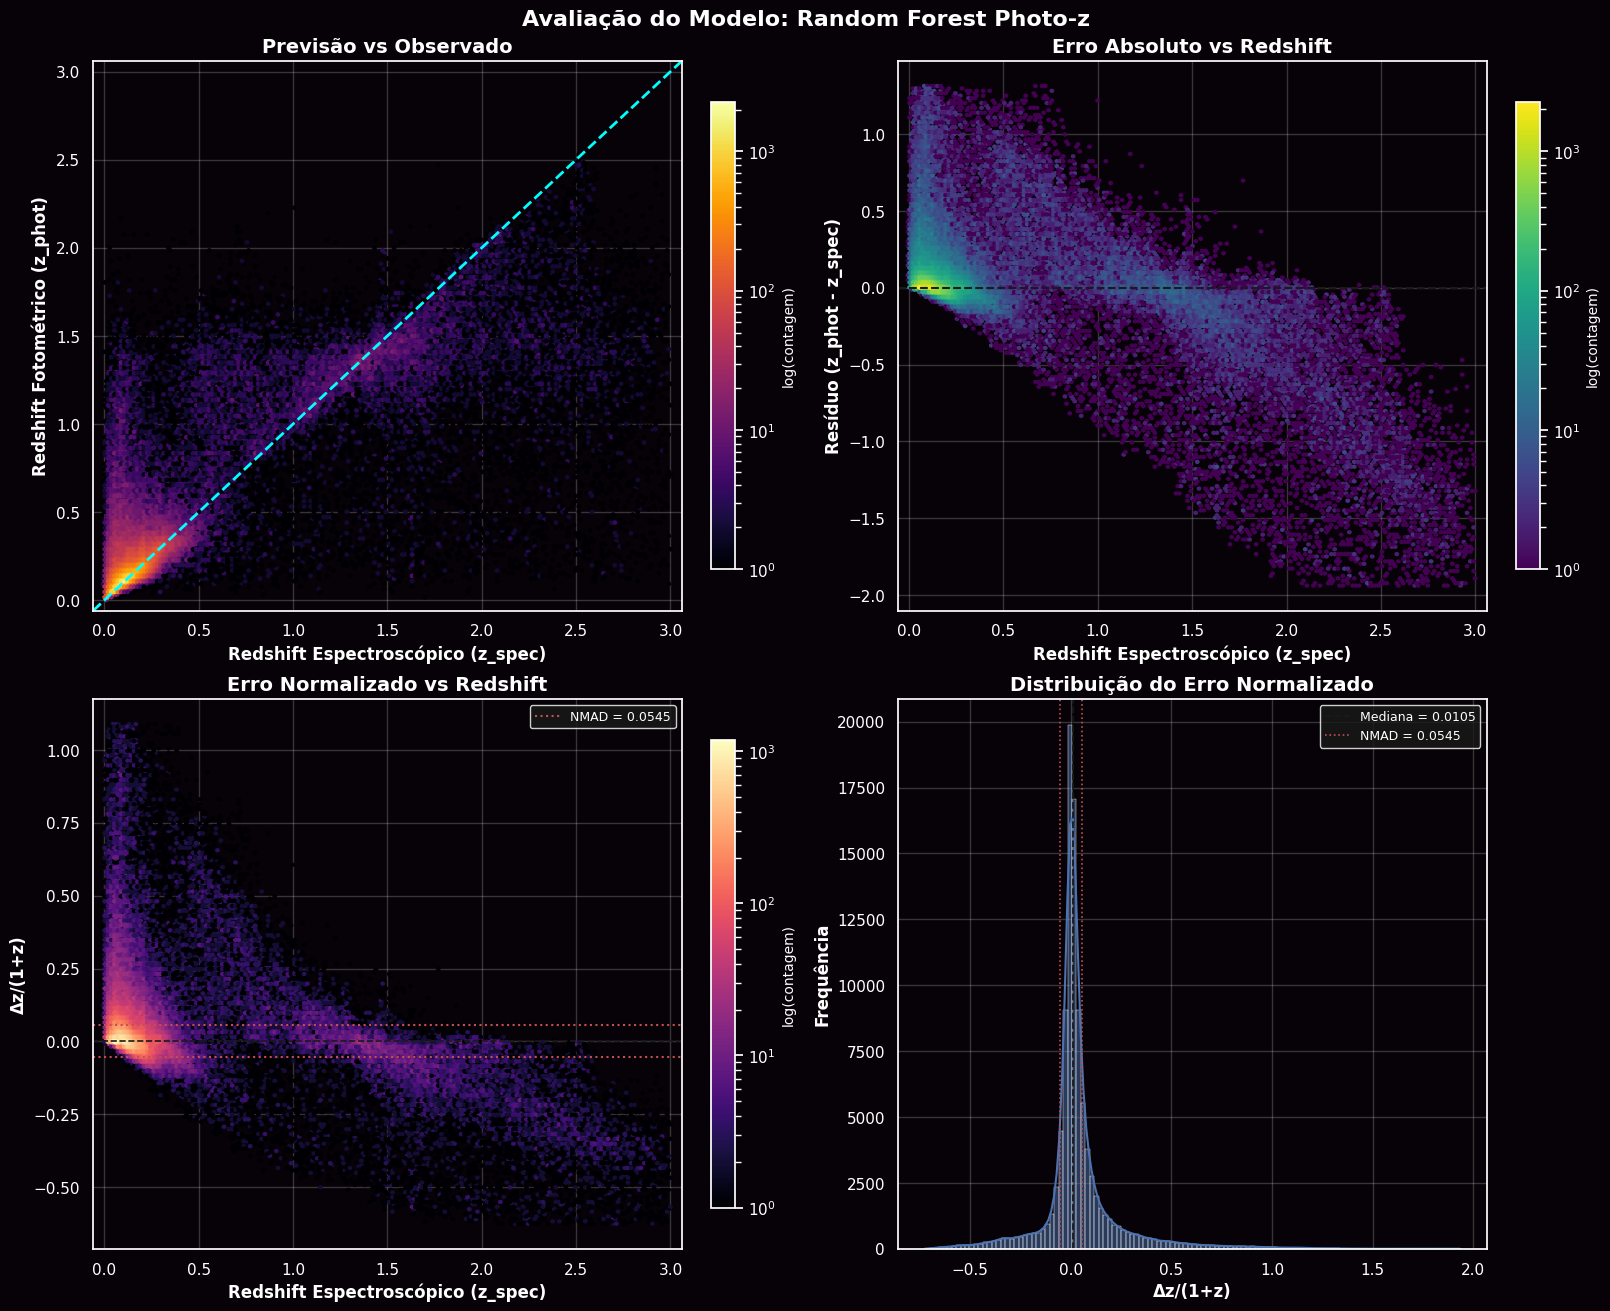

In [26]:
# Plots em 2x2 estilo consolidado (usar todo o z (y) no eixo x)
# Usa variáveis existentes: y_test, y_pred, mse, r2, nmad, outlier_rate, bias, rmse, mae, y

# (re)calcular métricas rápidas para garantir consistência
residuals = y_pred - y_test
dz = (y_pred - y_test) / (1 + y_test)
nmad_val = 1.4826 * np.median(np.abs(dz - np.median(dz)))
outlier_frac = (np.abs(dz) > 0.15).mean() * 100

print(f"MSE: {mse:.6f}  RMSE: {rmse:.6f}  MAE: {mae:.6f}  R²: {r2:.4f}")
print(f"Bias: {bias:.6f}  NMAD: {nmad_val:.6f}  Outliers (>0.15): {outlier_frac:.2f}%")

# Usar todo o intervalo de z disponível (variável `y`) como eixo x
x_min = np.nanmin(y)
x_max = np.nanmax(y)
if not np.isfinite(x_min) or not np.isfinite(x_max) or x_max <= x_min:
    x_min, x_max = 0.0, 0.5

# pequeno padding para melhor visual
pad = 0.02 * (x_max - x_min) if (x_max - x_min) > 0 else 0.01
x0, x1 = x_min - pad, x_max + pad

fig, axes = plt.subplots(2, 2, figsize=(16, 13))
cmap = 'inferno'

# 1) z_spec vs z_phot (hexbin) -- x usando todo o y
ax = axes[0, 0]
hb = ax.hexbin(y_test, y_pred, gridsize=180, bins='log', cmap=cmap, mincnt=1,
               extent=(x0, x1, x0, x1))
ax.plot([x0, x1], [x0, x1], ls='--', color='cyan', lw=2)
ax.set_xlim(x0, x1); ax.set_ylim(x0, x1)
ax.set_xlabel('Redshift Espectroscópico (z_spec)', fontsize=12, fontweight='bold')
ax.set_ylabel('Redshift Fotométrico (z_phot)', fontsize=12, fontweight='bold')
ax.set_title('Previsão vs Observado', fontsize=14, fontweight='bold')
cb = fig.colorbar(hb, ax=ax, shrink=0.85)
cb.set_label('log(contagem)', fontsize=10)

# 2) Resíduos vs z_spec (usar mesmo x-range)
ax = axes[0, 1]
# escolher limites de y para resíduos com base em percentis para evitar outliers extremos
res_low, res_high = np.nanpercentile(residuals, [0.5, 99.5])
res_pad = 0.05 * (res_high - res_low) if (res_high - res_low) > 0 else 0.01
hb2 = ax.hexbin(y_test, residuals, gridsize=180, bins='log', cmap='viridis', mincnt=1,
                extent=(x0, x1, res_low - res_pad, res_high + res_pad))
ax.axhline(0, color='k', ls='--', lw=1.5)
ax.set_xlim(x0, x1)
ax.set_xlabel('Redshift Espectroscópico (z_spec)', fontsize=12, fontweight='bold')
ax.set_ylabel('Resíduo (z_phot - z_spec)', fontsize=12, fontweight='bold')
ax.set_title('Erro Absoluto vs Redshift', fontsize=14, fontweight='bold')
cb2 = fig.colorbar(hb2, ax=ax, shrink=0.85)
cb2.set_label('log(contagem)', fontsize=10)

# 3) Δz/(1+z) vs z_spec (usar mesmo x-range)
ax = axes[1, 0]
dz_low, dz_high = np.nanpercentile(dz, [0.5, 99.5])
dz_pad = 0.05 * (dz_high - dz_low) if (dz_high - dz_low) > 0 else 0.01
hb3 = ax.hexbin(y_test, dz, gridsize=180, bins='log', cmap='magma', mincnt=1,
                extent=(x0, x1, dz_low - dz_pad, dz_high + dz_pad))
ax.axhline(0, color='k', ls='--', lw=1.2)
ax.set_xlim(x0, x1)
ax.set_xlabel('Redshift Espectroscópico (z_spec)', fontsize=12, fontweight='bold')
ax.set_ylabel('Δz/(1+z)', fontsize=12, fontweight='bold')
ax.set_title('Erro Normalizado vs Redshift', fontsize=14, fontweight='bold')
cb3 = fig.colorbar(hb3, ax=ax, shrink=0.85)
cb3.set_label('log(contagem)', fontsize=10)
# adicionar linhas de ±NMAD
ax.axhline(nmad_val, color='r', ls=':', lw=1.5, label=f'NMAD = {nmad_val:.4f}')
ax.axhline(-nmad_val, color='r', ls=':', lw=1.5)
ax.legend(loc='upper right', fontsize=9)

# 4) Histograma de Δz/(1+z)
ax = axes[1, 1]
sns.histplot(dz, bins=120, kde=True, stat='count', color='#4c72b0', ax=ax)
ax.set_xlabel('Δz/(1+z)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequência', fontsize=12, fontweight='bold')
ax.set_title('Distribuição do Erro Normalizado', fontsize=14, fontweight='bold')
ax.axvline(np.median(dz), color='k', ls='--', lw=1.3, label=f'Mediana = {np.median(dz):.4f}')
ax.axvline(nmad_val, color='r', ls=':', lw=1.2, label=f'NMAD = {nmad_val:.4f}')
ax.axvline(-nmad_val, color='r', ls=':', lw=1.2)
ax.legend(fontsize=9)

plt.suptitle('Avaliação do Modelo: Random Forest Photo-z', fontsize=16, fontweight='bold')

save_figure('photoz_rf_evaluation')
plt.show()

Analisando o grafico de Previsão vs Observado é constatado que o modelo tem um tendência a errar valores extremos (próximos a zero e dois) com maior densidade entre 0 e 0,5 (maior quantidade de objetos nessa faixa). Analisando erro absoluto é constatado que para valores acima de 0,5 o erro tende a aumentar, entretando a maior concentração do erro absoluto está entre 0 e 0,5 esse fato deve-se a distribuição dos dados de redshifts ser nessa faixa, esse fato pode ser visualizado observando os outliers (erros maiores que 0,15) a concetração deles está na região de maior concentração dos dados mostrando uma dificuldade do modelo em classificar dados corretamente nesta região.

## Comparação entre Modelos

Comparação final das métricas entre os três modelos treinados: Dummy Regressor (baseline), Random Forest e Deep Neural Network.

AVALIAÇÃO COMPARATIVA DOS MODELOS

Tabela Comparativa:
             Modelo      MSE     RMSE      MAE            R²      Bias     NMAD  Outliers (%)
   Dummy (Baseline) 0.380192 0.616597 0.430755 -1.495600e-09  0.000024 0.132306     84.866294
      Random Forest 0.131274 0.362317 0.174476  6.547173e-01  0.005655 0.054537     20.109528
Deep Neural Network 0.123852 0.351926 0.162309  6.742385e-01 -0.001018 0.054196     16.497302

✓ Figuras salvas: imagens/model_comparison.png (light e dark)
✓ Figuras salvas: imagens/model_comparison.png (light e dark)


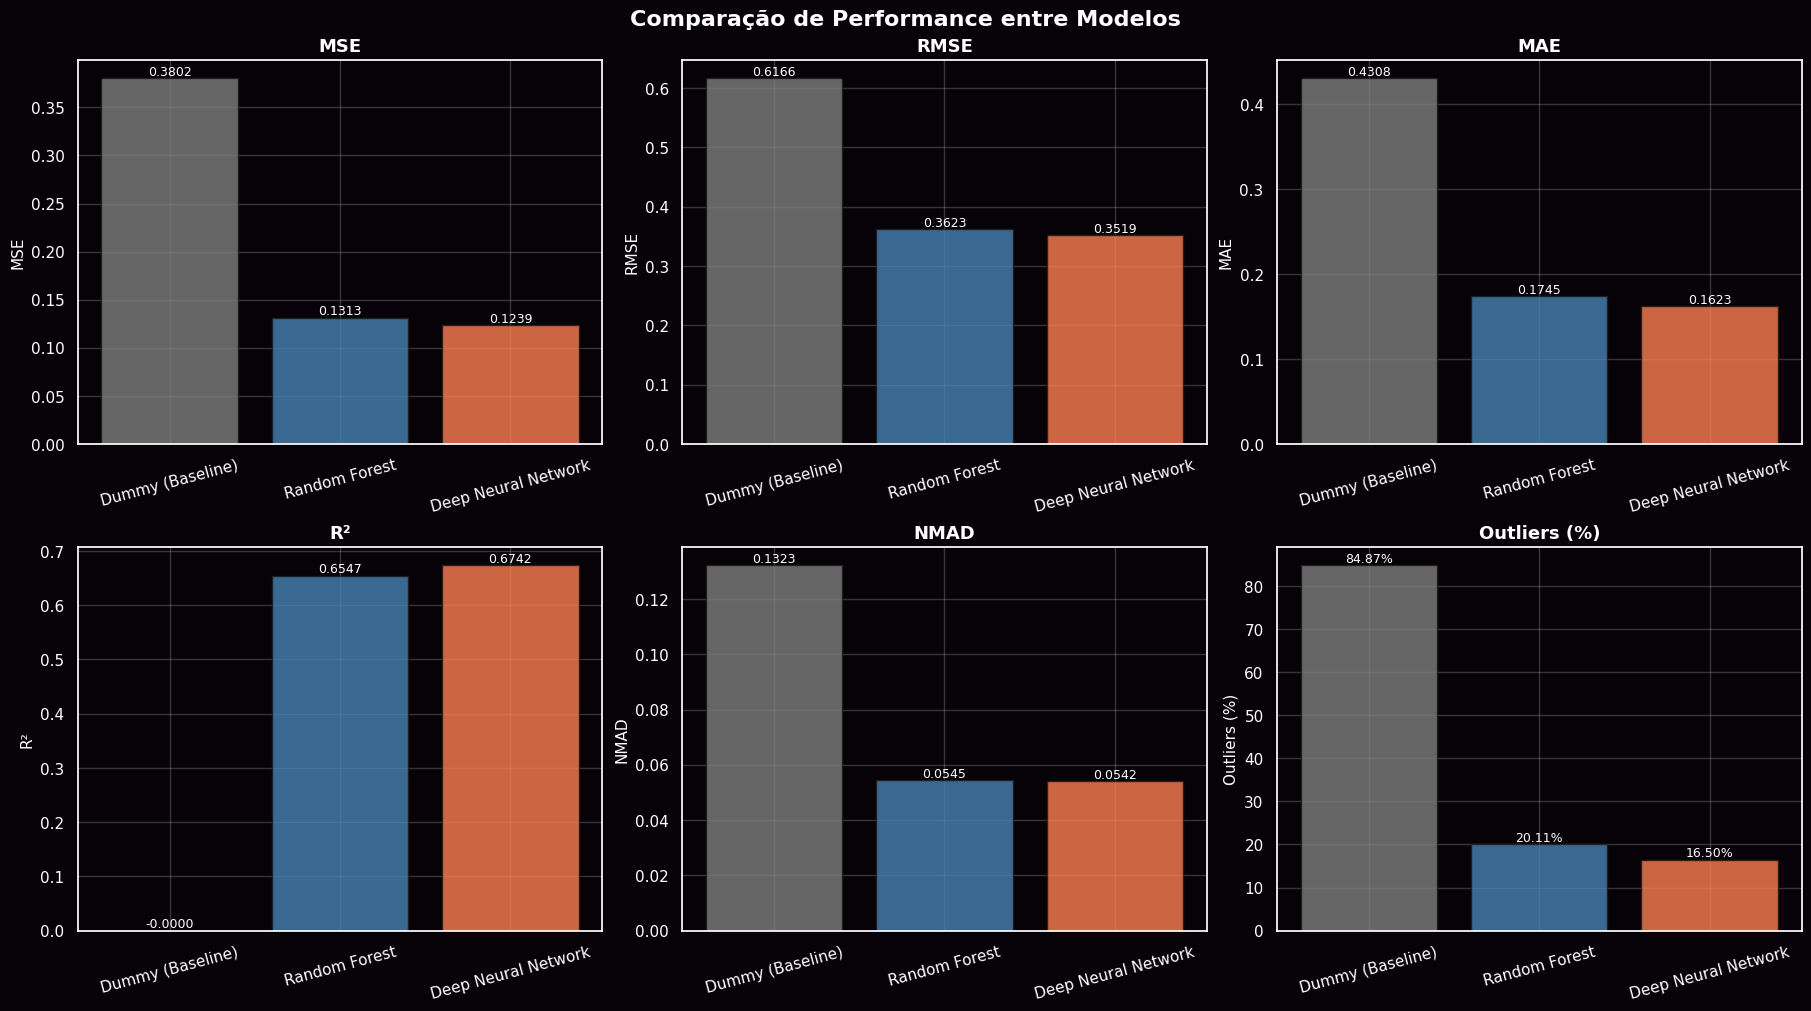


ANÁLISE DE MELHORIA RELATIVA AO BASELINE

Random Forest:
  Melhoria em RMSE: 41.24%
  Melhoria em NMAD: 58.78%
  Melhoria em R²: 65.47%

Deep Neural Network:
  Melhoria em RMSE: 42.92%
  Melhoria em NMAD: 59.04%
  Melhoria em R²: 67.42%


In [27]:
# Calcular métricas para todos os modelos no conjunto de teste
print("=" * 60)
print("AVALIAÇÃO COMPARATIVA DOS MODELOS")
print("=" * 60)

# Previsões do modelo DNN no conjunto de teste (PyTorch)
model_dnn.eval()
with torch.no_grad():
    X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)
    y_pred_dnn = model_dnn(X_test_tensor).cpu().numpy().flatten()

# Calcular métricas para DNN
mse_dnn = mean_squared_error(y_test, y_pred_dnn)
rmse_dnn = np.sqrt(mse_dnn)
mae_dnn = mean_absolute_error(y_test, y_pred_dnn)
r2_dnn = r2_score(y_test, y_pred_dnn)
bias_dnn = np.mean(y_pred_dnn - y_test)
dz_dnn = (y_pred_dnn - y_test) / (1 + y_test)
nmad_dnn = 1.4826 * np.median(np.abs(dz_dnn - np.median(dz_dnn)))
outlier_rate_dnn = (np.abs(dz_dnn) > 0.15).sum() / len(y_test) * 100

# Criar DataFrame comparativo
comparison_df = pd.DataFrame({
    'Modelo': ['Dummy (Baseline)', 'Random Forest', 'Deep Neural Network'],
    'MSE': [mse_dummy, mse, mse_dnn],
    'RMSE': [rmse_dummy, rmse, rmse_dnn],
    'MAE': [mae_dummy, mae, mae_dnn],
    'R²': [r2_dummy, r2, r2_dnn],
    'Bias': [bias_dummy, bias, bias_dnn],
    'NMAD': [nmad_dummy, nmad, nmad_dnn],
    'Outliers (%)': [outlier_rate_dummy, outlier_rate, outlier_rate_dnn]
})

print("\nTabela Comparativa:")
print(comparison_df.to_string(index=False))
print("\n" + "=" * 60)

# Visualização comparativa
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

metrics = ['MSE', 'RMSE', 'MAE', 'R²', 'NMAD', 'Outliers (%)']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]
    values = comparison_df[metric].values
    colors = ['gray', 'steelblue', 'coral']
    bars = ax.bar(comparison_df['Modelo'], values, color=colors, edgecolor='k', alpha=0.8)
    
    ax.set_title(f'{metric}', fontsize=13, fontweight='bold')
    ax.set_ylabel(metric, fontsize=11)
    ax.tick_params(axis='x', rotation=15)
    ax.grid(axis='y', alpha=0.3)
    
    # Anotar valores nas barras
    for bar, val in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{val:.4f}' if metric != 'Outliers (%)' else f'{val:.2f}%',
                ha='center', va='bottom', fontsize=9)

plt.suptitle('Comparação de Performance entre Modelos', fontsize=16, fontweight='bold')
save_figure('model_comparison')
plt.show()

# Análise de melhoria
print("\n" + "=" * 60)
print("ANÁLISE DE MELHORIA RELATIVA AO BASELINE")
print("=" * 60)
print(f"\nRandom Forest:")
print(f"  Melhoria em RMSE: {(1 - rmse/rmse_dummy)*100:.2f}%")
print(f"  Melhoria em NMAD: {(1 - nmad/nmad_dummy)*100:.2f}%")
print(f"  Melhoria em R²: {((r2 - r2_dummy)/(1 - r2_dummy))*100:.2f}%")

print(f"\nDeep Neural Network:")
print(f"  Melhoria em RMSE: {(1 - rmse_dnn/rmse_dummy)*100:.2f}%")
print(f"  Melhoria em NMAD: {(1 - nmad_dnn/nmad_dummy)*100:.2f}%")
print(f"  Melhoria em R²: {((r2_dnn - r2_dummy)/(1 - r2_dummy))*100:.2f}%")
print("=" * 60)

## Análises Adicionais de Photo-z

Análises complementares para entender melhor o comportamento do modelo.

ANÁLISE DE OUTLIERS POR FAIXA DE REDSHIFT

 Faixa z  N Objetos     NMAD      Bias  Outliers (%)
0.0-0.3      74227 0.040848  0.068489     12.744689
0.3-0.6       7477 0.111915  0.095813     28.875217
0.6-1.0       3775 0.197524  0.125334     56.582781
1.0-1.5       4900 0.075453 -0.027029     19.081633
1.5-3.0       9504 0.178459 -0.215310     56.776094
✓ Figuras salvas: imagens/performance_por_faixas.png (light e dark)
✓ Figuras salvas: imagens/performance_por_faixas.png (light e dark)


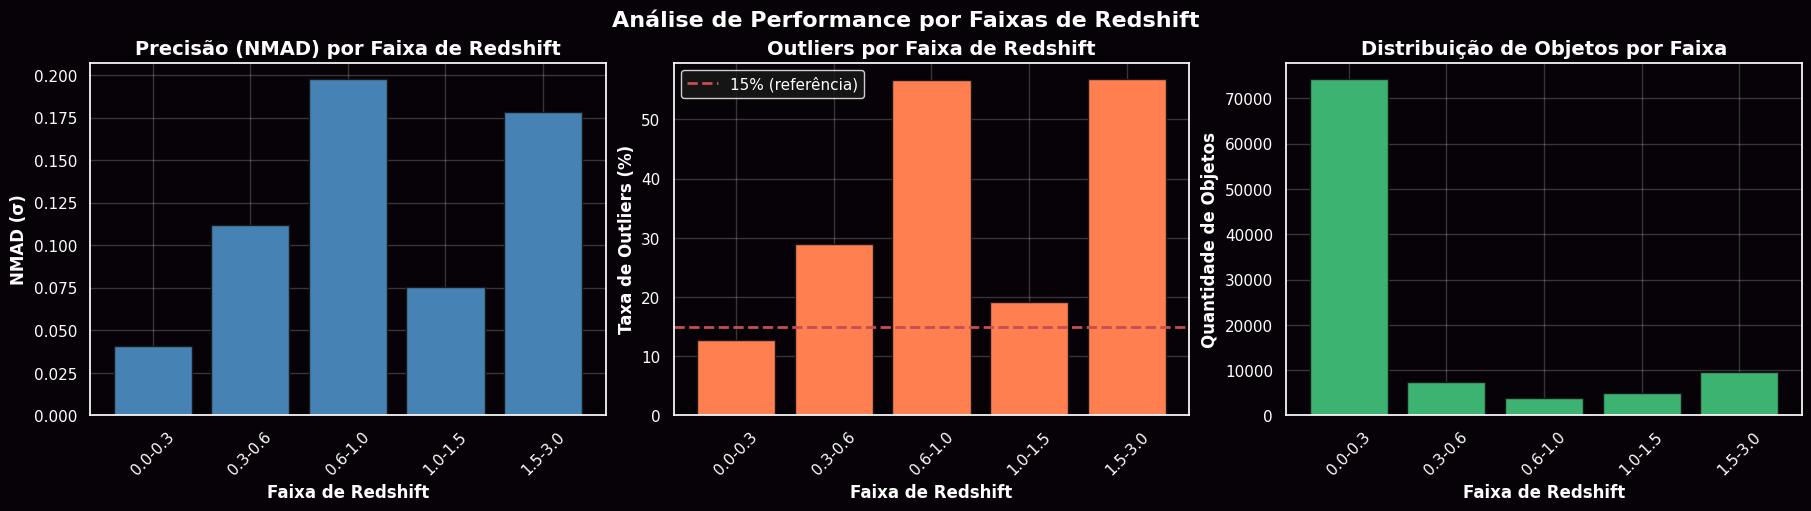

In [28]:
# 1. Análise de Outliers por Faixas de Redshift
print("=" * 60)
print("ANÁLISE DE OUTLIERS POR FAIXA DE REDSHIFT")
print("=" * 60)

# Definir faixas de redshift
z_ranges = [(0, 0.3), (0.3, 0.6), (0.6, 1.0), (1.0, 1.5), (1.5, 3.0)]
outlier_threshold = 0.15

results = []
for z_min, z_max in z_ranges:
    mask = (y_test >= z_min) & (y_test < z_max)
    n_objects = mask.sum()

    if n_objects > 0:
        dz_range = dz[mask]
        outliers_range = np.abs(dz_range) > outlier_threshold
        outlier_rate = (outliers_range.sum() / n_objects) * 100
        nmad_range = 1.4826 * np.median(np.abs(dz_range - np.median(dz_range)))
        bias_range = np.mean(dz_range)

        results.append({
            'Faixa z': f'{z_min:.1f}-{z_max:.1f}',
            'N Objetos': n_objects,
            'NMAD': nmad_range,
            'Bias': bias_range,
            'Outliers (%)': outlier_rate
        })

df_results = pd.DataFrame(results)
print("\n", df_results.to_string(index=False))
print("=" * 60)

# Visualização
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: NMAD por faixa
ax = axes[0]
ax.bar(range(len(df_results)), df_results['NMAD'], color='steelblue', edgecolor='k')
ax.set_xlabel('Faixa de Redshift', fontsize=12, fontweight='bold')
ax.set_ylabel('NMAD (σ)', fontsize=12, fontweight='bold')
ax.set_title('Precisão (NMAD) por Faixa de Redshift', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(df_results)))
ax.set_xticklabels(df_results['Faixa z'], rotation=45)
ax.grid(axis='y', alpha=0.3)

# Plot 2: Taxa de outliers
ax = axes[1]
ax.bar(range(len(df_results)), df_results['Outliers (%)'], color='coral', edgecolor='k')
ax.set_xlabel('Faixa de Redshift', fontsize=12, fontweight='bold')
ax.set_ylabel('Taxa de Outliers (%)', fontsize=12, fontweight='bold')
ax.set_title('Outliers por Faixa de Redshift', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(df_results)))
ax.set_xticklabels(df_results['Faixa z'], rotation=45)
ax.axhline(15, color='r', ls='--', lw=2, label='15% (referência)')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Plot 3: Número de objetos
ax = axes[2]
ax.bar(range(len(df_results)), df_results['N Objetos'], color='mediumseagreen', edgecolor='k')
ax.set_xlabel('Faixa de Redshift', fontsize=12, fontweight='bold')
ax.set_ylabel('Quantidade de Objetos', fontsize=12, fontweight='bold')
ax.set_title('Distribuição de Objetos por Faixa', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(df_results)))
ax.set_xticklabels(df_results['Faixa z'], rotation=45)
ax.grid(axis='y', alpha=0.3)

plt.suptitle('Análise de Performance por Faixas de Redshift', fontsize=16, fontweight='bold')
save_figure('performance_por_faixas')
plt.show()

ANÁLISE DE OUTLIERS CATASTRÓFICOS
Outliers catastróficos: 20086 / 99883 (20.11%)
✓ Figuras salvas: imagens/outliers_catastroficos.png (light e dark)
✓ Figuras salvas: imagens/outliers_catastroficos.png (light e dark)


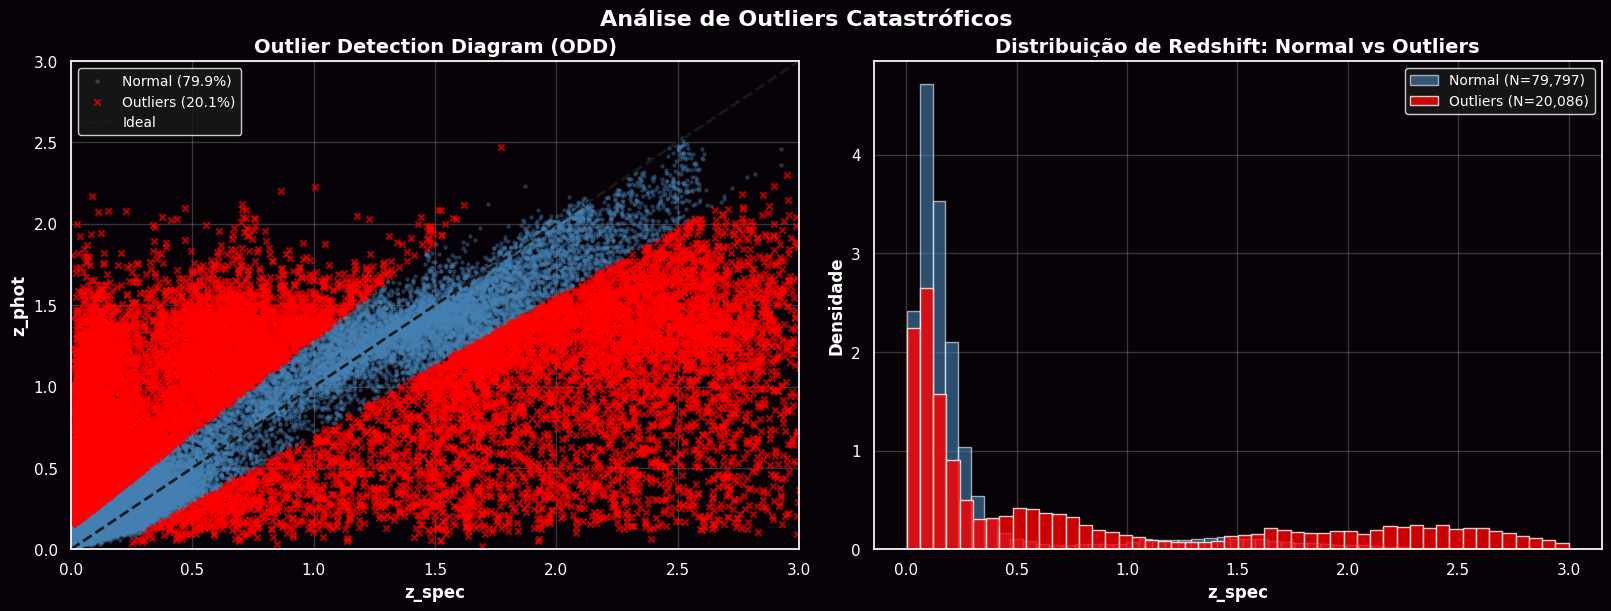


Estatísticas dos Outliers Catastróficos:
  z_spec médio: 0.8372
  z_spec mediano: 0.3912
  z_spec min-max: [0.0021, 2.9994]


In [29]:
# 2. Análise de Outliers Catastróficos (ODD - Outlier Detection Diagram)
print("=" * 60)
print("ANÁLISE DE OUTLIERS CATASTRÓFICOS")
print("=" * 60)

# Identificar outliers catastróficos (|Δz/(1+z)| > 0.15)
catastrophic_mask = np.abs(dz) > 0.15
n_catastrophic = catastrophic_mask.sum()
catastrophic_rate = (n_catastrophic / len(y_test)) * 100

print(f"Outliers catastróficos: {n_catastrophic} / {len(y_test)} ({catastrophic_rate:.2f}%)")

# Criar ODD (Outlier Detection Diagram)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: ODD - z_phot vs z_spec colorido por outlier
ax = axes[0]
# Não-outliers em azul
ax.scatter(y_test[~catastrophic_mask], y_pred[~catastrophic_mask],
           s=5, alpha=0.3, c='steelblue', label=f'Normal ({100-catastrophic_rate:.1f}%)')
# Outliers em vermelho
ax.scatter(y_test[catastrophic_mask], y_pred[catastrophic_mask],
           s=20, alpha=0.7, c='red', marker='x', label=f'Outliers ({catastrophic_rate:.1f}%)')
ax.plot([0, 3], [0, 3], 'k--', lw=2, label='Ideal')
ax.set_xlabel('z_spec', fontsize=12, fontweight='bold')
ax.set_ylabel('z_phot', fontsize=12, fontweight='bold')
ax.set_title('Outlier Detection Diagram (ODD)', fontsize=14, fontweight='bold')
ax.legend(loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)

# Plot 2: Distribuição de z_spec para outliers vs não-outliers
ax = axes[1]
ax.hist(y_test[~catastrophic_mask], bins=50, alpha=0.6, color='steelblue',
        label=f'Normal (N={len(y_test[~catastrophic_mask]):,})', density=True)
ax.hist(y_test[catastrophic_mask], bins=50, alpha=0.8, color='red',
        label=f'Outliers (N={n_catastrophic:,})', density=True)
ax.set_xlabel('z_spec', fontsize=12, fontweight='bold')
ax.set_ylabel('Densidade', fontsize=12, fontweight='bold')
ax.set_title('Distribuição de Redshift: Normal vs Outliers', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3)

plt.suptitle('Análise de Outliers Catastróficos', fontsize=16, fontweight='bold')
save_figure('outliers_catastroficos')
plt.show()

# Análise estatística dos outliers
print(f"\nEstatísticas dos Outliers Catastróficos:")
print(f"  z_spec médio: {y_test[catastrophic_mask].mean():.4f}")
print(f"  z_spec mediano: {np.median(y_test[catastrophic_mask]):.4f}")
print(f"  z_spec min-max: [{y_test[catastrophic_mask].min():.4f}, {y_test[catastrophic_mask].max():.4f}]")

IMPORTÂNCIA DAS FEATURES

Top 20 features mais importantes:
       Feature  Importance
           U-I    0.071307
        U-F660    0.051793
        U-F861    0.051424
           U-R    0.048939
           G-I    0.047033
           U-Z    0.040038
        F378-I    0.035469
     F378-F861    0.035186
           G-Z    0.027583
     F378-F660    0.026464
        F378-R    0.024705
        F378-Z    0.023623
        G-F861    0.023162
        G-F660    0.022710
           G-R    0.020331
    mag_auto_z    0.019915
        U-F515    0.018504
    mag_auto_i    0.016194
mag_auto_j0861    0.015026
mag_auto_j0515    0.012968
✓ Figuras salvas: imagens/feature_importance.png (light e dark)
✓ Figuras salvas: imagens/feature_importance.png (light e dark)


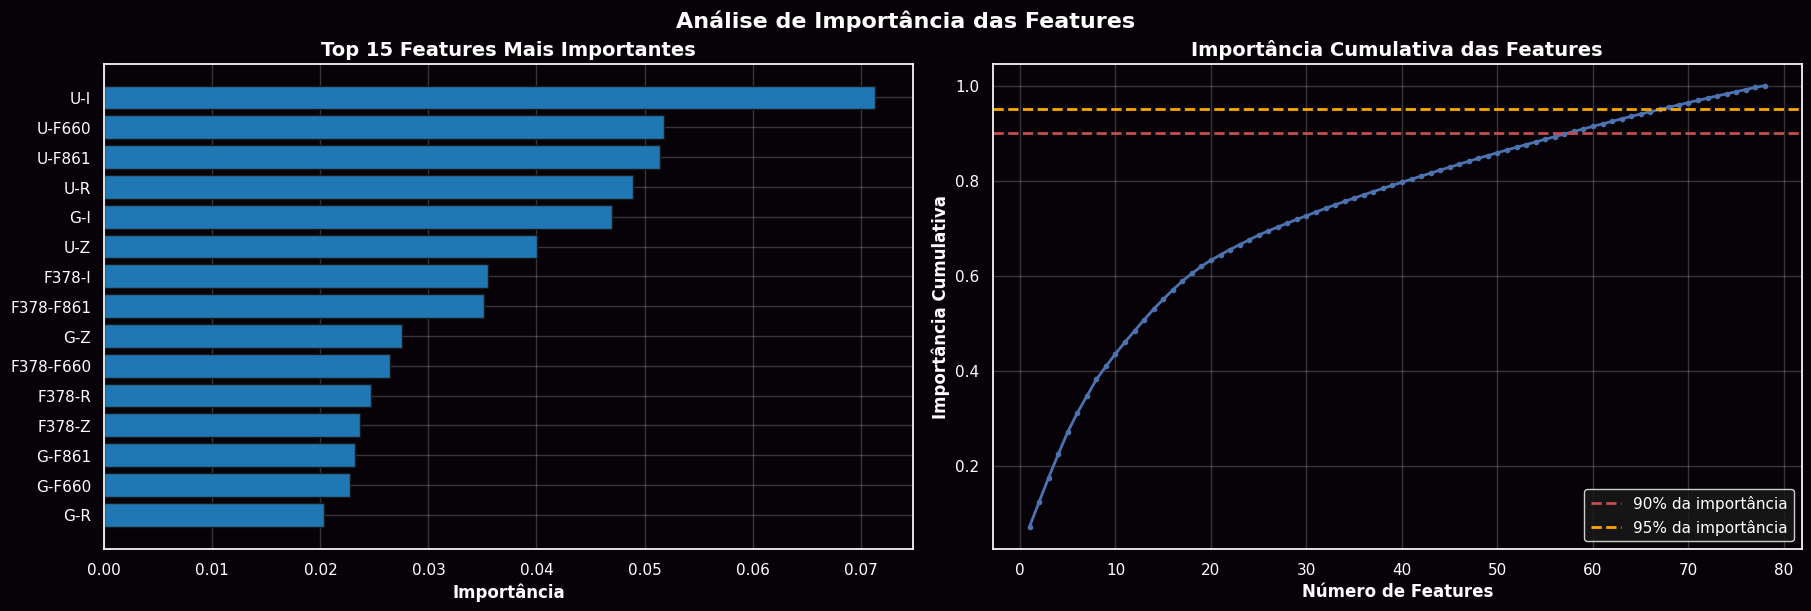


Número de features para:
  90% da importância: 58 features
  95% da importância: 68 features


In [30]:
# 3. Feature Importance - Quais features são mais importantes?
print("=" * 60)
print("IMPORTÂNCIA DAS FEATURES")
print("=" * 60)

# Obter importâncias
feature_names = mags_auto + color_names
importances = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("\nTop 20 features mais importantes:")
print(feature_importance_df.head(20).to_string(index=False))

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Top 15 features
ax = axes[0]
top_15 = feature_importance_df.head(15)
colors = ['#2ca02c' if 'mag_auto' in f and not 'j0' in f else '#1f77b4' for f in top_15['Feature']]
ax.barh(range(len(top_15)), top_15['Importance'], color=colors, edgecolor='k')
ax.set_yticks(range(len(top_15)))
ax.set_yticklabels([f.replace('mag_auto_', '') for f in top_15['Feature']])
ax.set_xlabel('Importância', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Features Mais Importantes', fontsize=14, fontweight='bold')
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

# Plot 2: Importância cumulativa
ax = axes[1]
cumsum = np.cumsum(feature_importance_df['Importance'].values)
ax.plot(range(1, len(cumsum)+1), cumsum, marker='o', markersize=3, linewidth=2)
ax.axhline(0.9, color='r', ls='--', lw=2, label='90% da importância')
ax.axhline(0.95, color='orange', ls='--', lw=2, label='95% da importância')
ax.set_xlabel('Número de Features', fontsize=12, fontweight='bold')
ax.set_ylabel('Importância Cumulativa', fontsize=12, fontweight='bold')
ax.set_title('Importância Cumulativa das Features', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.suptitle('Análise de Importância das Features', fontsize=16, fontweight='bold')
save_figure('feature_importance')
plt.show()

# Quantas features são necessárias para 90% e 95%
n_90 = np.argmax(cumsum >= 0.9) + 1
n_95 = np.argmax(cumsum >= 0.95) + 1
print(f"\nNúmero de features para:")
print(f"  90% da importância: {n_90} features")
print(f"  95% da importância: {n_95} features")

No painel da esquerda da Figura acima, os atributos em azul referem-se a cores e em verde a magnitudes.

MATRIZ DE CONFUSÃO - REDSHIFT BINNED


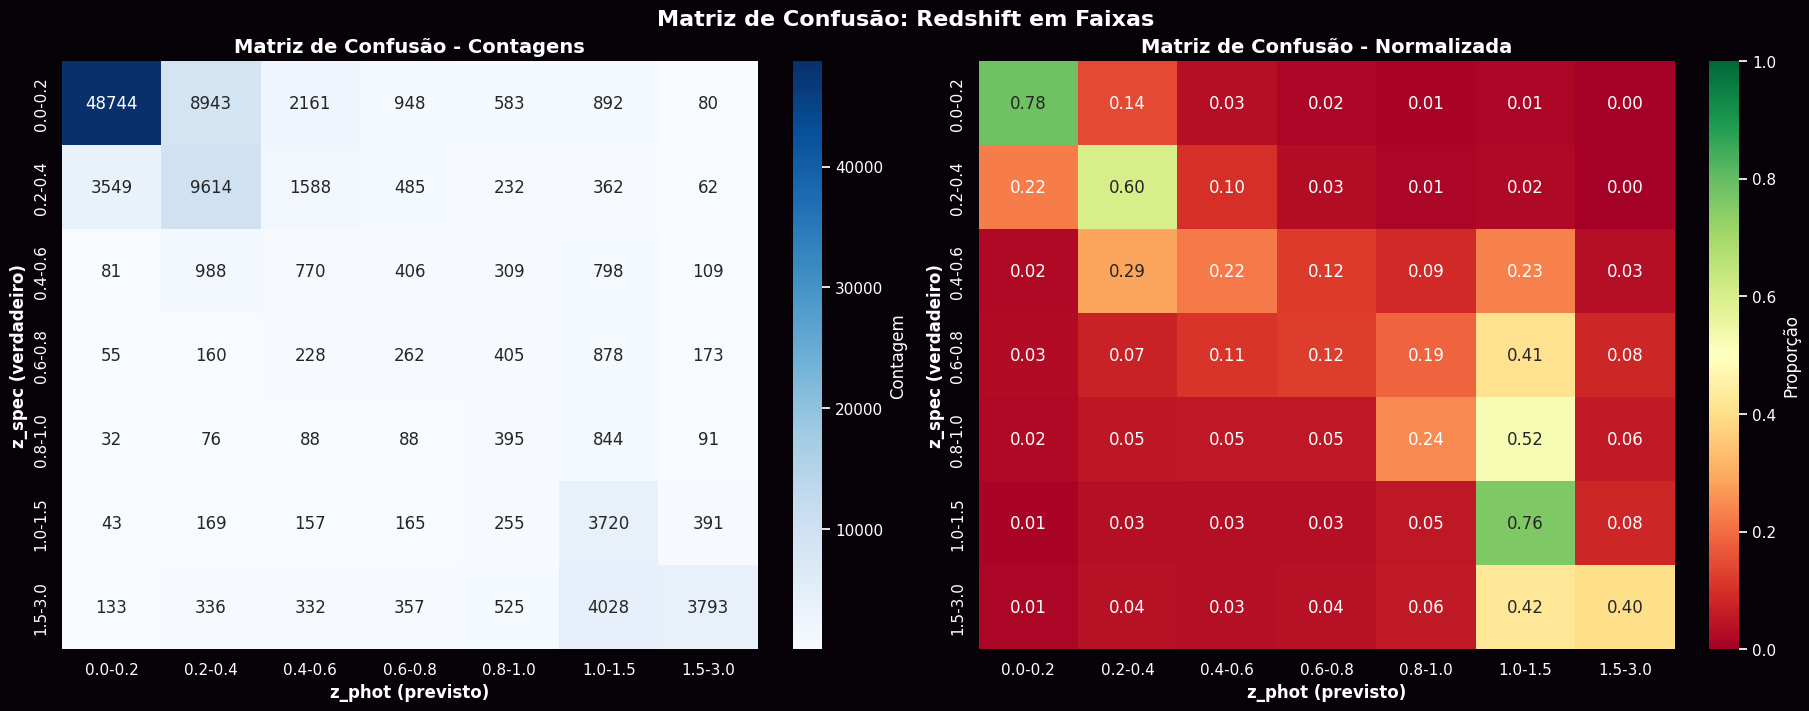


Acurácia por faixa de redshift:
  0.0-0.2: 78.2%
  0.2-0.4: 60.5%
  0.4-0.6: 22.2%
  0.6-0.8: 12.1%
  0.8-1.0: 24.5%
  1.0-1.5: 75.9%
  1.5-3.0: 39.9%


In [31]:
# 4. Matriz de Confusão de Redshift (Binned)
print("=" * 60)
print("MATRIZ DE CONFUSÃO - REDSHIFT BINNED")
print("=" * 60)

# Criar bins de redshift para matriz de confusão
z_bins_edges = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.5, 3.0]
z_bins_labels = ['0.0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0', '1.0-1.5', '1.5-3.0']

y_test_binned = pd.cut(y_test, bins=z_bins_edges, labels=z_bins_labels)
y_pred_binned = pd.cut(y_pred, bins=z_bins_edges, labels=z_bins_labels)

# Criar matriz de confusão
conf_matrix = confusion_matrix(y_test_binned, y_pred_binned, labels=z_bins_labels)

# Normalizar por linha (percentual por classe verdadeira)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Matriz absoluta
ax = axes[0]
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=z_bins_labels, yticklabels=z_bins_labels, ax=ax, cbar_kws={'label': 'Contagem'})
ax.set_xlabel('z_phot (previsto)', fontsize=12, fontweight='bold')
ax.set_ylabel('z_spec (verdadeiro)', fontsize=12, fontweight='bold')
ax.set_title('Matriz de Confusão - Contagens', fontsize=14, fontweight='bold')

# Matriz normalizada
ax = axes[1]
sns.heatmap(conf_matrix_norm, annot=True, fmt='.2f', cmap='RdYlGn', vmin=0, vmax=1,
            xticklabels=z_bins_labels, yticklabels=z_bins_labels, ax=ax, cbar_kws={'label': 'Proporção'})
ax.set_xlabel('z_phot (previsto)', fontsize=12, fontweight='bold')
ax.set_ylabel('z_spec (verdadeiro)', fontsize=12, fontweight='bold')
ax.set_title('Matriz de Confusão - Normalizada', fontsize=14, fontweight='bold')

plt.suptitle('Matriz de Confusão: Redshift em Faixas', fontsize=16, fontweight='bold')
plt.show()

# Acurácia por faixa
print("\nAcurácia por faixa de redshift:")
for i, label in enumerate(z_bins_labels):
    accuracy = conf_matrix_norm[i, i]
    print(f"  {label}: {accuracy*100:.1f}%")